In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [13]:
Train_data = pd.read_csv('Train_Scaled_Cont_Int.csv')
Validation_data = pd.read_csv('Valid_Scaled_Cont_Int.csv')
Test_data = pd.read_csv('Test_Scaled_Cont_Int.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         12000 non-null  float64
 1   AnnualIncome                12000 non-null  float64
 2   CreditScore                 12000 non-null  float64
 3   EmploymentStatus            12000 non-null  int64  
 4   EducationLevel              12000 non-null  int64  
 5   Experience                  12000 non-null  float64
 6   LoanAmount                  12000 non-null  float64
 7   LoanDuration                12000 non-null  float64
 8   MaritalStatus               12000 non-null  int64  
 9   NumberOfDependents          12000 non-null  float64
 10  HomeOwnershipStatus         12000 non-null  int64  
 11  MonthlyDebtPayments         12000 non-null  float64
 12  CreditCardUtilizationRate   12000 non-null  float64
 13  NumberOfOpenCreditLines     120

In [14]:
Train_data.head()

Age  AnnualIncome  CreditScore  EmploymentStatus  EducationLevel  \
0  1.487718     -0.305854    -1.172820                 0               0   
1 -0.740634     -0.364793     0.315682                 0               3   
2  0.030718      0.698946     0.746564                 0               3   
3  1.659129      3.766004     1.862940                 0               2   
4 -0.654928     -0.121030     0.061069                 0               4   

   Experience  LoanAmount  LoanDuration  MaritalStatus  NumberOfDependents  \
0    1.549408   -0.674158     -1.226708              1            0.342057   
1   -1.006777    1.288418      1.217582              1            1.776507   
2    0.050955   -0.530405     -0.737850              0            1.776507   
3    1.637552   -0.381553      0.239866              1           -1.092394   
4   -0.477911    0.913035     -0.248992              0           -0.375169   

   ...  MonthlyIncome  UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0  ...      -0.830534                   -0.707898  -1.340131 -0.327901   
1  ...      -0.358890                   -0.655377   0.441316  0.194702   
2  ...       0.720578                   -0.634868  -1.340131 -0.311338   
3  ...       3.832985                    0.895194  -0.894769 -0.005362   
4  ...      -0.111522                   -0.792593  -0.449407 -0.535198   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0         -0.120724      0.498070           -0.088823                0.505214   
1          0.968318      2.112439            0.565780                0.083891   
2         -1.167424     -0.582772           -0.354121               -0.702282   
3         -1.350636     -1.302610           -0.601173               -1.033090   
4          0.161041      0.107046            0.462228               -0.034117   

   LoanApproved  RiskScore  
0             0   0.030033  
1             0  -0.098772  
2             0   0.287644  
3             1  -2.211181  
4             0   0.287644  

[5 rows x 35 columns]

In [15]:
X_training = Train_data.drop('LoanApproved',axis=1)
y_training = Train_data['LoanApproved']

In [16]:
y_training.min()

0

In [17]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
y_validation = Validation_data['LoanApproved']

In [18]:
X_testing = Test_data.drop('LoanApproved',axis=1)
y_testing = Test_data['LoanApproved']

In [19]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [20]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [21]:
print(y_training)

[0 0 0 ... 1 0 0]


In [22]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

Training Losses are 
          0
0  0.653631
1  0.652204
2  0.650797
3  0.649410
4  0.648043
Validation Data
Confusion Matrix for hidden layer 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


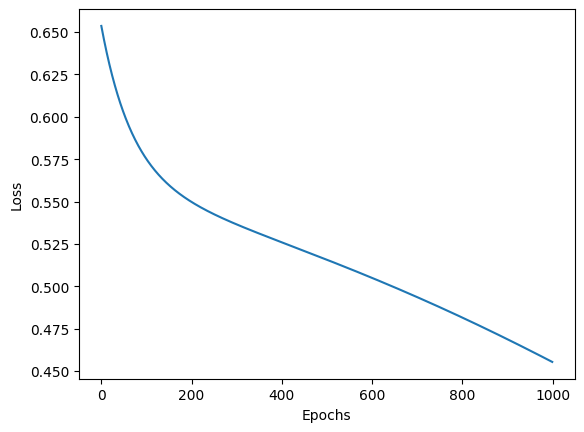

Training Losses are 
          0
0  0.678574
1  0.675607
2  0.672712
3  0.669887
4  0.667131
Validation Data
Confusion Matrix for hidden layer 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16
[[3044    0]
 [ 953    3]]
Accuracy: 0.7618, Precision: 1.0000, Recall: 0.0031, F1-score: 0.0063



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


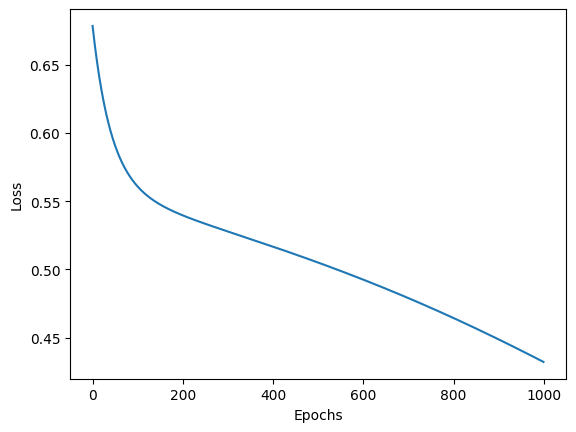

Training Losses are 
          0
0  0.628980
1  0.625381
2  0.621942
3  0.618655
4  0.615512
Validation Data
Confusion Matrix for hidden layer 32
[[3044    0]
 [ 882   74]]
Accuracy: 0.7795, Precision: 1.0000, Recall: 0.0774, F1-score: 0.1437

Test Data
Confusion Matrix for hiden layer 32
[[3044    0]
 [ 880   76]]
Accuracy: 0.7800, Precision: 1.0000, Recall: 0.0795, F1-score: 0.1473



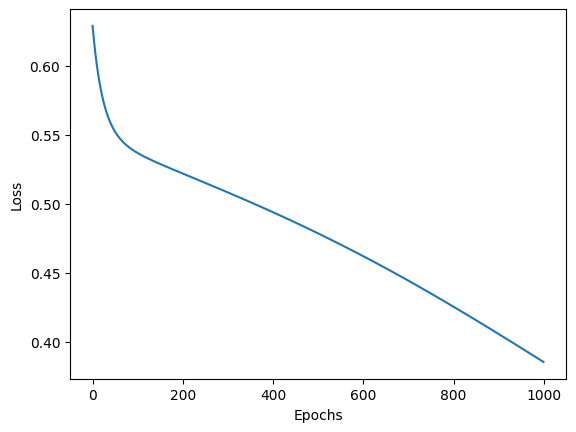

Training Losses are 
          0
0  0.638658
1  0.630971
2  0.623908
3  0.617415
4  0.611443
Validation Data
Confusion Matrix for hidden layer 64
[[3044    0]
 [ 606  350]]
Accuracy: 0.8485, Precision: 1.0000, Recall: 0.3661, F1-score: 0.5360

Test Data
Confusion Matrix for hiden layer 64
[[3043    1]
 [ 606  350]]
Accuracy: 0.8482, Precision: 0.9972, Recall: 0.3661, F1-score: 0.5356



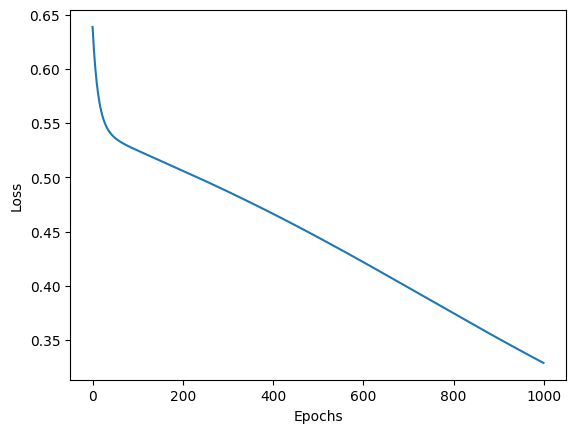

Training Losses are 
          0
0  0.674976
1  0.656106
2  0.640234
3  0.626861
4  0.615566
Validation Data
Confusion Matrix for hidden layer 128
[[3039    5]
 [ 513  443]]
Accuracy: 0.8705, Precision: 0.9888, Recall: 0.4634, F1-score: 0.6311

Test Data
Confusion Matrix for hiden layer 128
[[3041    3]
 [ 494  462]]
Accuracy: 0.8758, Precision: 0.9935, Recall: 0.4833, F1-score: 0.6502



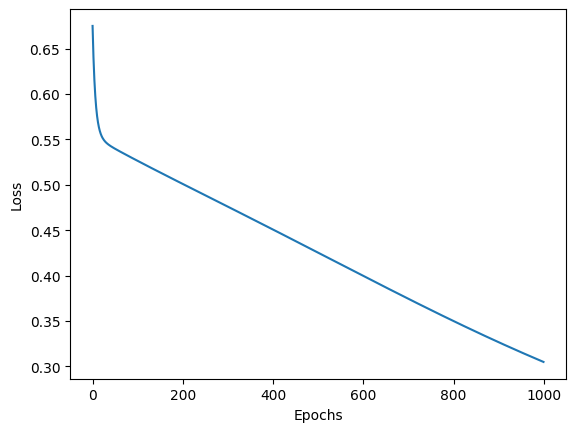

Best accuracy for test data is 0.87575 for degree 128


In [24]:
nuerons = [8,16,32,64,128]
min_loss = 0
best_degree = 1000
for nueron in nuerons:
  model = SingleLayer(34,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.SGD(model.parameters(), lr=0.01)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss:
    min_loss = acc
    best_degree = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss} for degree {best_degree}")

Training Losses are 
          0
0  0.677254
1  0.675111
2  0.672980
3  0.670864
4  0.668761
Validation Data
Confusion Matrix for hidden layer 8
[[3026   18]
 [  39  917]]
Accuracy: 0.9858, Precision: 0.9807, Recall: 0.9592, F1-score: 0.9699

Test Data
Confusion Matrix for hiden layer 8
[[3025   19]
 [  32  924]]
Accuracy: 0.9872, Precision: 0.9799, Recall: 0.9665, F1-score: 0.9731



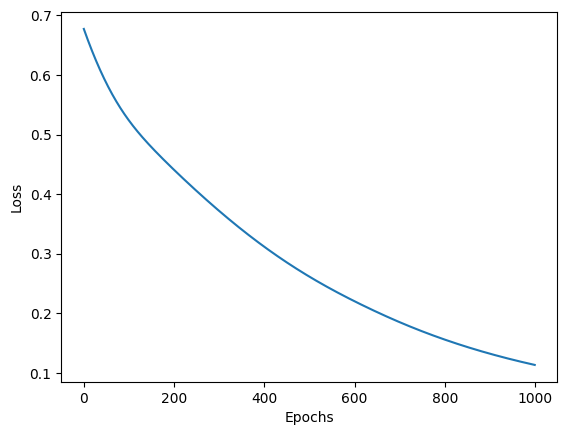

Training Losses are 
          0
0  0.684000
1  0.680296
2  0.676635
3  0.673019
4  0.669449
Validation Data
Confusion Matrix for hidden layer 16
[[3028   16]
 [  26  930]]
Accuracy: 0.9895, Precision: 0.9831, Recall: 0.9728, F1-score: 0.9779

Test Data
Confusion Matrix for hiden layer 16
[[3025   19]
 [  20  936]]
Accuracy: 0.9902, Precision: 0.9801, Recall: 0.9791, F1-score: 0.9796



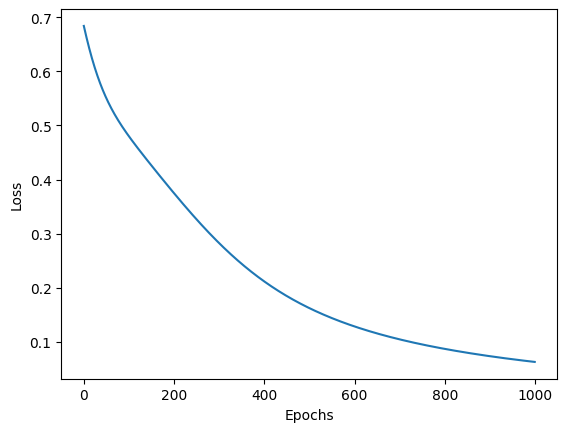

Training Losses are 
          0
0  0.640538
1  0.634891
2  0.629363
3  0.623957
4  0.618673
Validation Data
Confusion Matrix for hidden layer 32
[[3034   10]
 [  14  942]]
Accuracy: 0.9940, Precision: 0.9895, Recall: 0.9854, F1-score: 0.9874

Test Data
Confusion Matrix for hiden layer 32
[[3031   13]
 [  13  943]]
Accuracy: 0.9935, Precision: 0.9864, Recall: 0.9864, F1-score: 0.9864



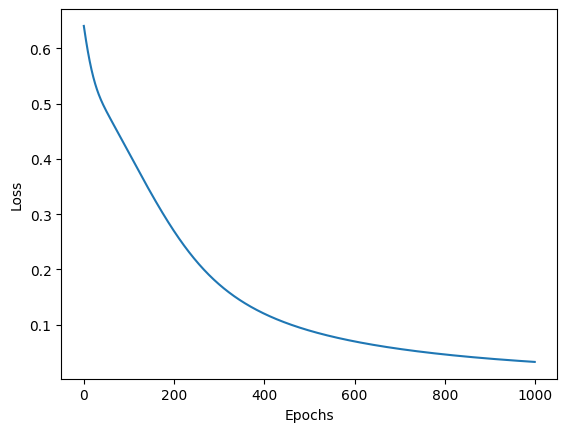

Training Losses are 
          0
0  0.813335
1  0.798149
2  0.783377
3  0.769025
4  0.755101
Validation Data
Confusion Matrix for hidden layer 64
[[3033   11]
 [  12  944]]
Accuracy: 0.9942, Precision: 0.9885, Recall: 0.9874, F1-score: 0.9880

Test Data
Confusion Matrix for hiden layer 64
[[3034   10]
 [  10  946]]
Accuracy: 0.9950, Precision: 0.9895, Recall: 0.9895, F1-score: 0.9895



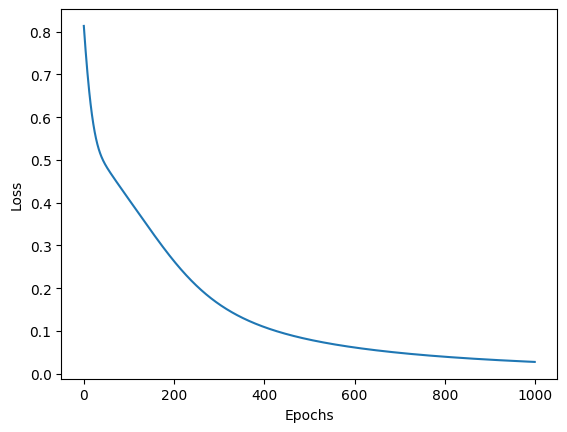

Training Losses are 
          0
0  0.761982
1  0.736899
2  0.713263
3  0.691094
4  0.670405
Validation Data
Confusion Matrix for hidden layer 128
[[3038    6]
 [   4  952]]
Accuracy: 0.9975, Precision: 0.9937, Recall: 0.9958, F1-score: 0.9948

Test Data
Confusion Matrix for hiden layer 128
[[3039    5]
 [   6  950]]
Accuracy: 0.9972, Precision: 0.9948, Recall: 0.9937, F1-score: 0.9942



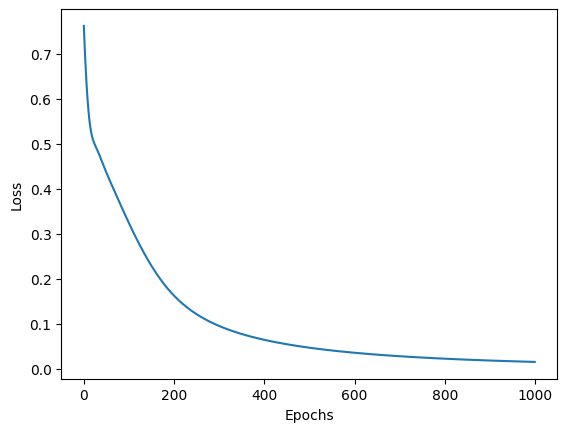

Best accuracy for test data is 0.99725 for degree 128


In [27]:
nuerons = [8,16,32,64,128]
min_loss_2 = 0
best_degree_2 = 1000
for nueron in nuerons:
  model = SingleLayer(34,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss_2:
    min_loss_2 = acc
    best_degree_2 = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss_2} for degree {best_degree_2}")
  #HARDWARE PROBELM MIGHT WORK BETTER WITH A GOOD HARDWARE

In [29]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.612464
1  0.611570
2  0.610688
3  0.609819
4  0.608962
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


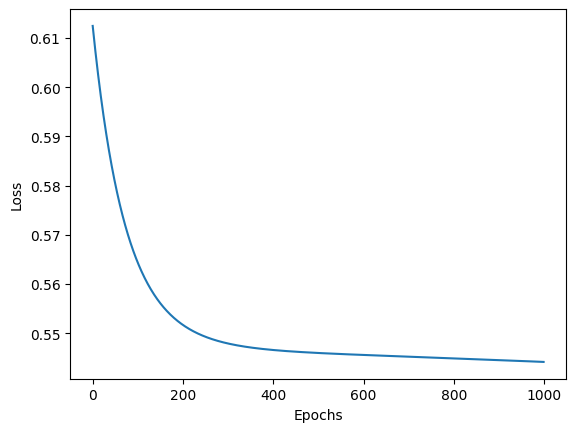

Training Losses are 
          0
0  0.572012
1  0.571615
2  0.571226
3  0.570846
4  0.570474
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


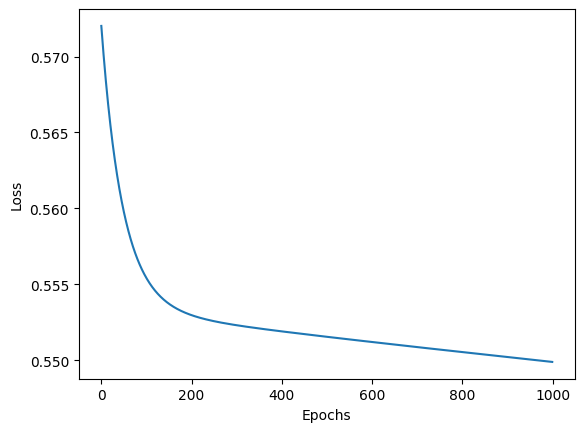

Training Losses are 
          0
0  0.670179
1  0.664803
2  0.659686
3  0.654813
4  0.650173
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


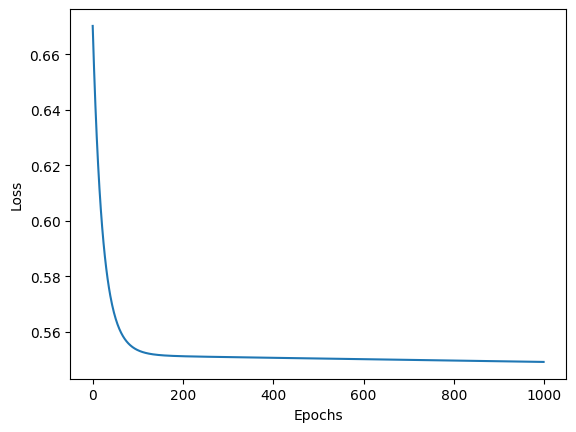

Training Losses are 
          0
0  0.665379
1  0.656494
2  0.648331
3  0.640829
4  0.633933
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


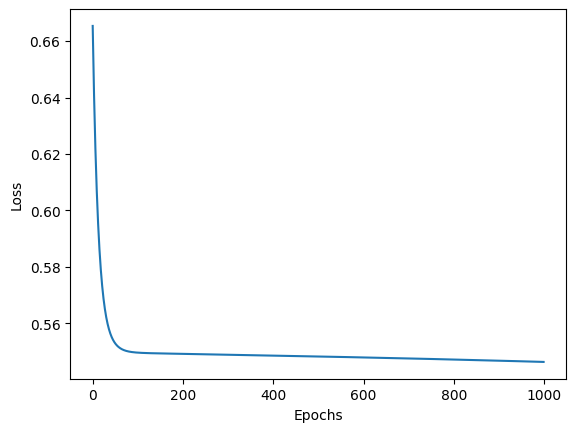

Training Losses are 
          0
0  0.636927
1  0.635478
2  0.634055
3  0.632656
4  0.631282
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


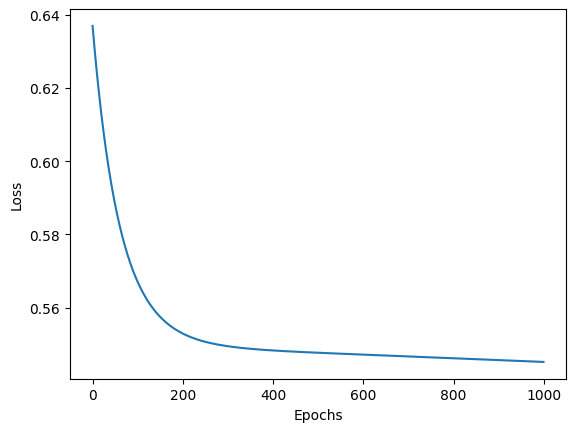

Training Losses are 
          0
0  0.632852
1  0.630779
2  0.628761
3  0.626796
4  0.624882
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


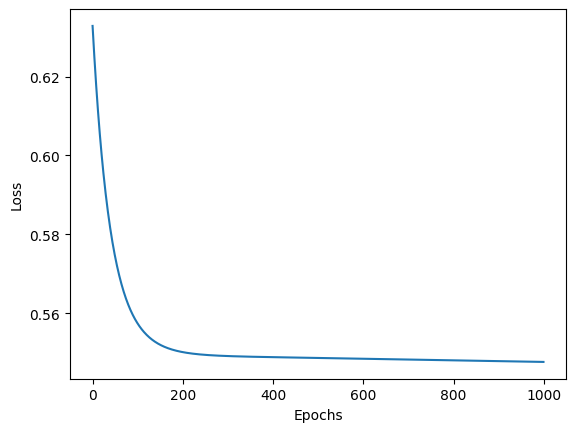

Training Losses are 
          0
0  0.676578
1  0.671588
2  0.666808
3  0.662230
4  0.657845
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


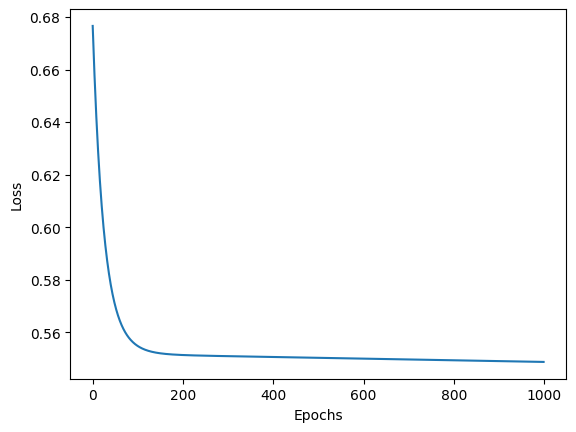

Training Losses are 
          0
0  0.757353
1  0.739844
2  0.723845
3  0.709233
4  0.695890
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


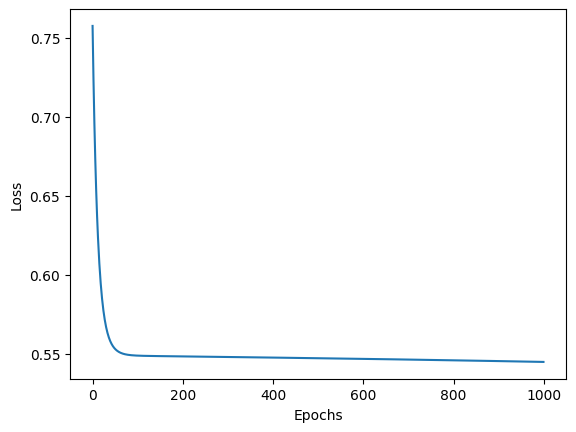

Training Losses are 
          0
0  0.559322
1  0.559192
2  0.559064
3  0.558938
4  0.558813
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


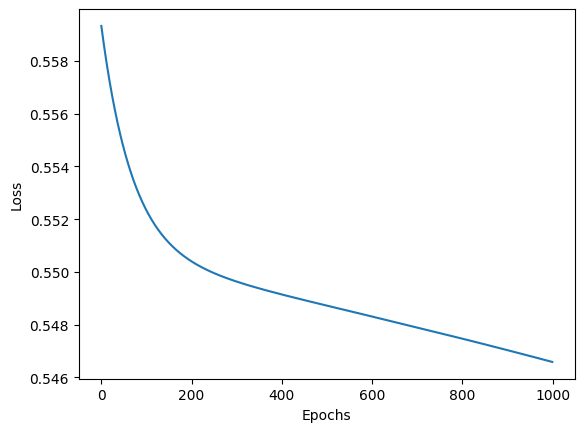

Training Losses are 
          0
0  0.688657
1  0.685161
2  0.681758
3  0.678443
4  0.675216
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


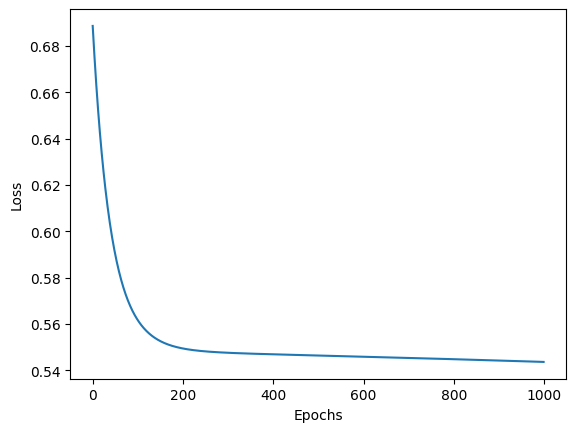

Training Losses are 
          0
0  0.697209
1  0.690961
2  0.684988
3  0.679278
4  0.673819
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


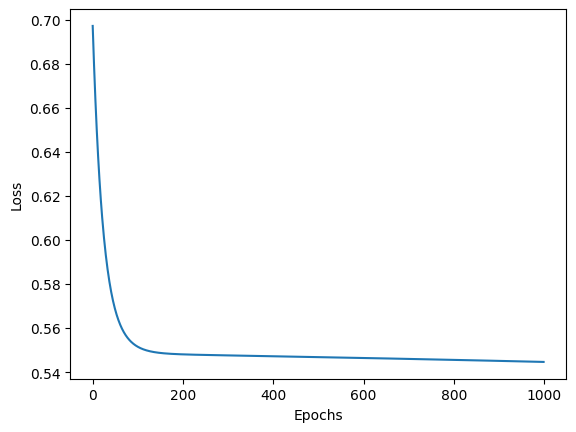

Training Losses are 
          0
0  0.722111
1  0.708270
2  0.695592
3  0.683982
4  0.673347
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


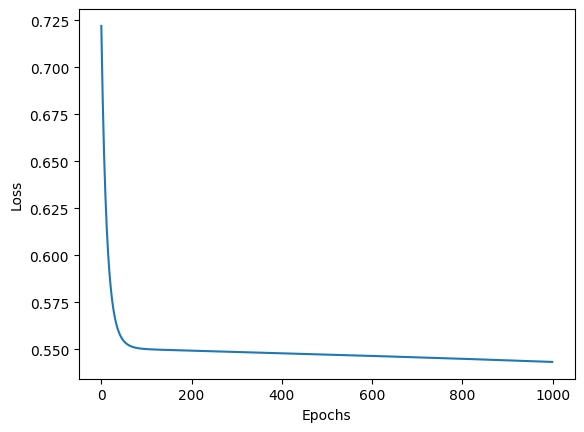

Training Losses are 
          0
0  0.687491
1  0.685383
2  0.683311
3  0.681275
4  0.679274
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


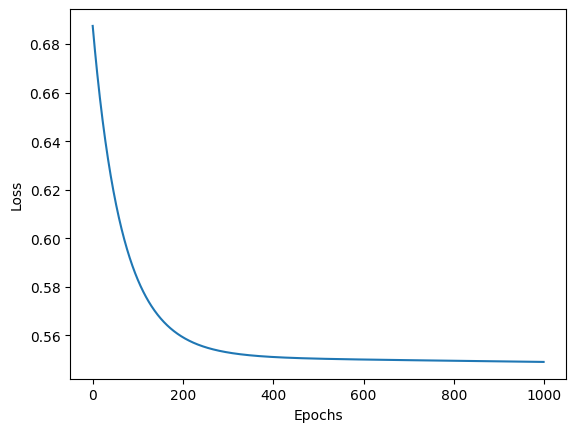

Training Losses are 
          0
0  0.747371
1  0.742010
2  0.736798
3  0.731732
4  0.726808
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


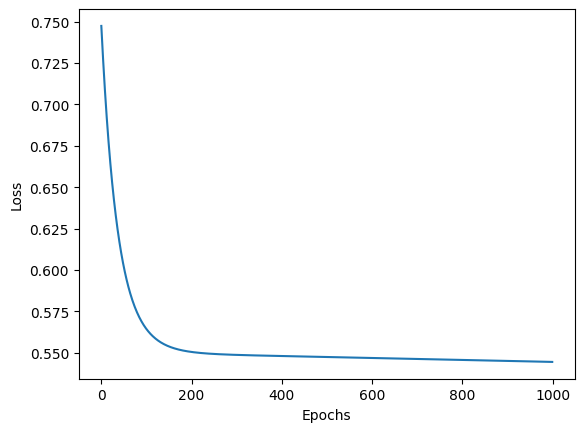

Training Losses are 
          0
0  0.812220
1  0.800521
2  0.789350
3  0.778685
4  0.768505
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


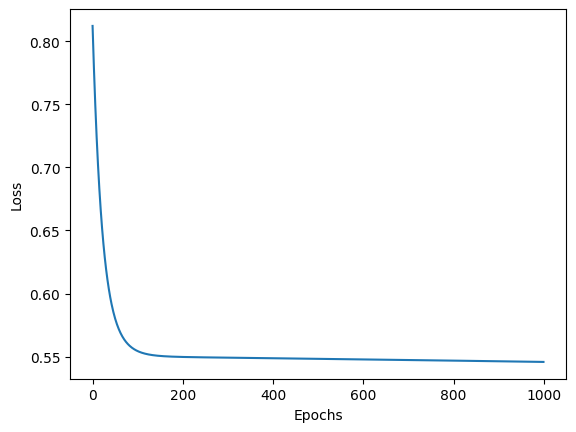

Training Losses are 
          0
0  0.749067
1  0.732922
2  0.718127
3  0.704572
4  0.692154
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


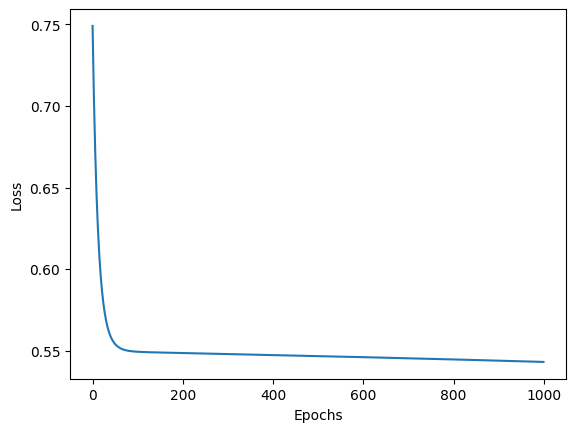

Best accuracy for test data is 0.761 for degree 8


In [30]:
nuerons = [8,16,32,64]
best_accuracy_1=0
best_degree_3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(34,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_1:
        best_accuracy_1=acc
        best_degree_3=nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_1} for degree {best_degree_3}")

Training Losses are 
          0
0  0.715202
1  0.713123
2  0.711055
3  0.708998
4  0.706952
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3033   11]
 [  24  932]]
Accuracy: 0.9912, Precision: 0.9883, Recall: 0.9749, F1-score: 0.9816

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3029   15]
 [  20  936]]
Accuracy: 0.9912, Precision: 0.9842, Recall: 0.9791, F1-score: 0.9816



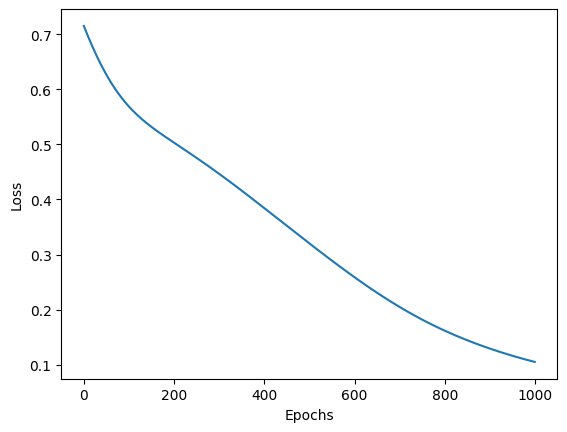

Training Losses are 
          0
0  0.587766
1  0.585997
2  0.584264
3  0.582568
4  0.580909
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3035    9]
 [  10  946]]
Accuracy: 0.9952, Precision: 0.9906, Recall: 0.9895, F1-score: 0.9901

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3034   10]
 [  10  946]]
Accuracy: 0.9950, Precision: 0.9895, Recall: 0.9895, F1-score: 0.9895



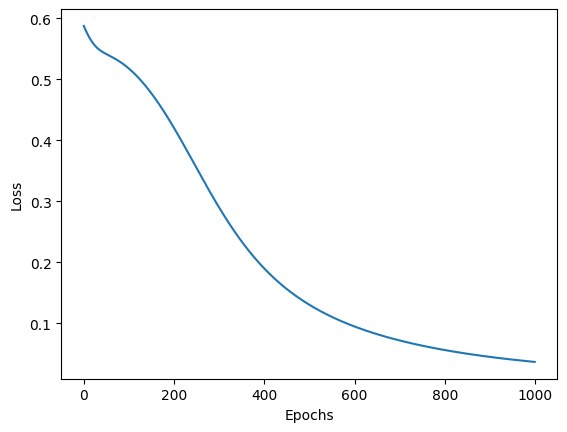

Training Losses are 
          0
0  0.711178
1  0.705508
2  0.699951
3  0.694509
4  0.689182
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[3036    8]
 [  10  946]]
Accuracy: 0.9955, Precision: 0.9916, Recall: 0.9895, F1-score: 0.9906

Test Data
Confusion Matrix for hiden layer 8 and 32
[[3033   11]
 [  12  944]]
Accuracy: 0.9942, Precision: 0.9885, Recall: 0.9874, F1-score: 0.9880



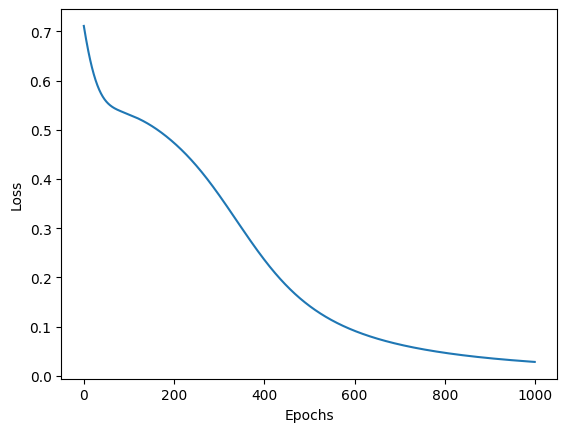

Training Losses are 
          0
0  0.683135
1  0.673135
2  0.663546
3  0.654373
4  0.645617
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[3038    6]
 [   7  949]]
Accuracy: 0.9968, Precision: 0.9937, Recall: 0.9927, F1-score: 0.9932

Test Data
Confusion Matrix for hiden layer 8 and 64
[[3037    7]
 [   7  949]]
Accuracy: 0.9965, Precision: 0.9927, Recall: 0.9927, F1-score: 0.9927



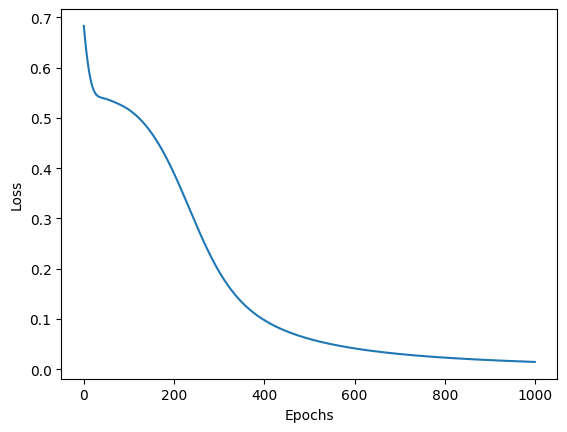

Training Losses are 
          0
0  0.605502
1  0.604089
2  0.602692
3  0.601311
4  0.599947
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3037    7]
 [   8  948]]
Accuracy: 0.9962, Precision: 0.9927, Recall: 0.9916, F1-score: 0.9922

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3035    9]
 [   7  949]]
Accuracy: 0.9960, Precision: 0.9906, Recall: 0.9927, F1-score: 0.9916



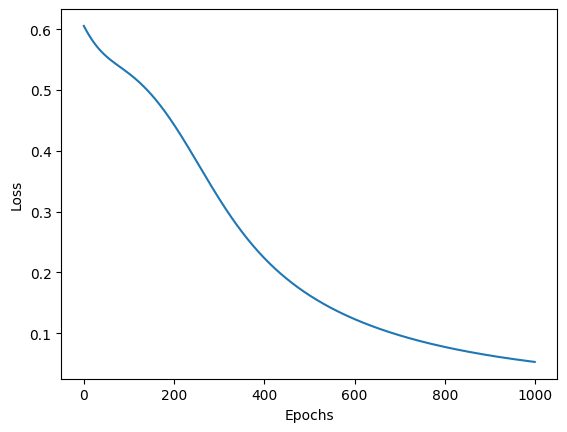

Training Losses are 
          0
0  0.747404
1  0.742991
2  0.738637
3  0.734340
4  0.730103
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[3036    8]
 [  10  946]]
Accuracy: 0.9955, Precision: 0.9916, Recall: 0.9895, F1-score: 0.9906

Test Data
Confusion Matrix for hiden layer 16 and 16
[[3034   10]
 [   9  947]]
Accuracy: 0.9952, Precision: 0.9896, Recall: 0.9906, F1-score: 0.9901



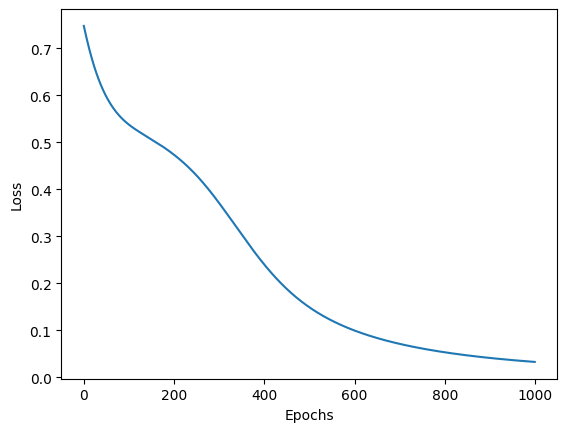

Training Losses are 
          0
0  0.874545
1  0.865193
2  0.855984
3  0.846919
4  0.838000
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[3037    7]
 [   8  948]]
Accuracy: 0.9962, Precision: 0.9927, Recall: 0.9916, F1-score: 0.9922

Test Data
Confusion Matrix for hiden layer 16 and 32
[[3035    9]
 [   9  947]]
Accuracy: 0.9955, Precision: 0.9906, Recall: 0.9906, F1-score: 0.9906



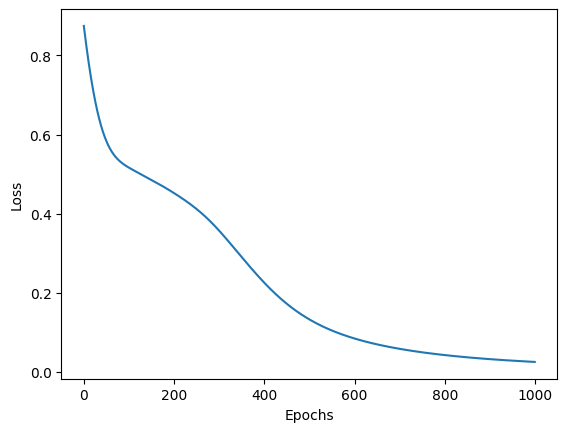

Training Losses are 
          0
0  0.679523
1  0.669405
2  0.659721
3  0.650476
4  0.641673
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[3039    5]
 [   4  952]]
Accuracy: 0.9978, Precision: 0.9948, Recall: 0.9958, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 16 and 64
[[3040    4]
 [   3  953]]
Accuracy: 0.9982, Precision: 0.9958, Recall: 0.9969, F1-score: 0.9963



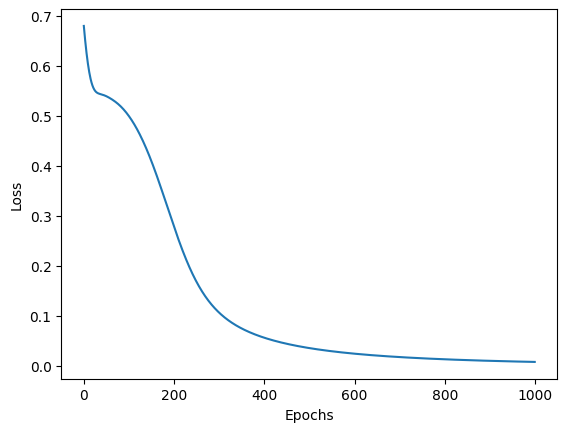

Training Losses are 
          0
0  0.567038
1  0.565638
2  0.564279
3  0.562962
4  0.561686
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3039    5]
 [   4  952]]
Accuracy: 0.9978, Precision: 0.9948, Recall: 0.9958, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3041    3]
 [   4  952]]
Accuracy: 0.9982, Precision: 0.9969, Recall: 0.9958, F1-score: 0.9963



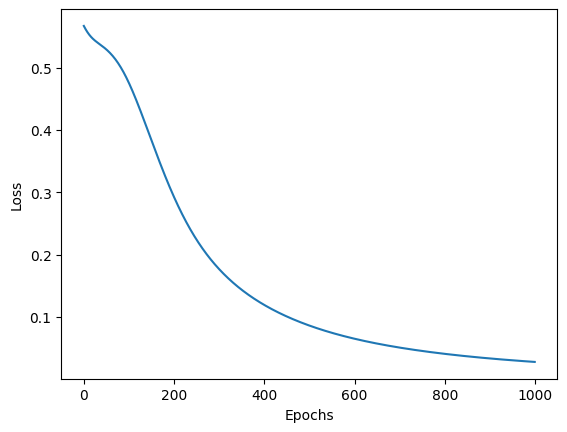

Training Losses are 
          0
0  0.694722
1  0.689579
2  0.684538
3  0.679602
4  0.674772
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[3039    5]
 [   4  952]]
Accuracy: 0.9978, Precision: 0.9948, Recall: 0.9958, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 32 and 16
[[3040    4]
 [   6  950]]
Accuracy: 0.9975, Precision: 0.9958, Recall: 0.9937, F1-score: 0.9948



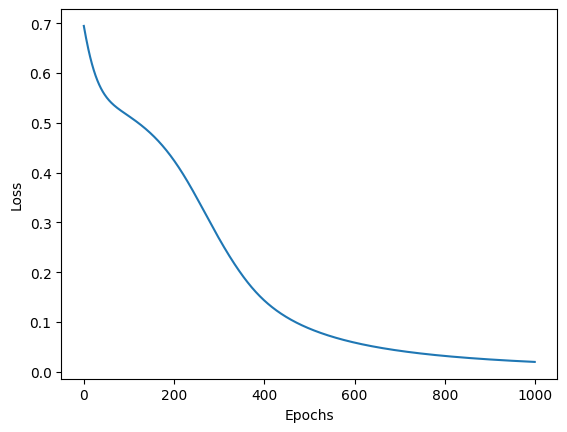

Training Losses are 
          0
0  0.748533
1  0.739174
2  0.730074
3  0.721236
4  0.712657
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[3039    5]
 [   4  952]]
Accuracy: 0.9978, Precision: 0.9948, Recall: 0.9958, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 32 and 32
[[3041    3]
 [   5  951]]
Accuracy: 0.9980, Precision: 0.9969, Recall: 0.9948, F1-score: 0.9958



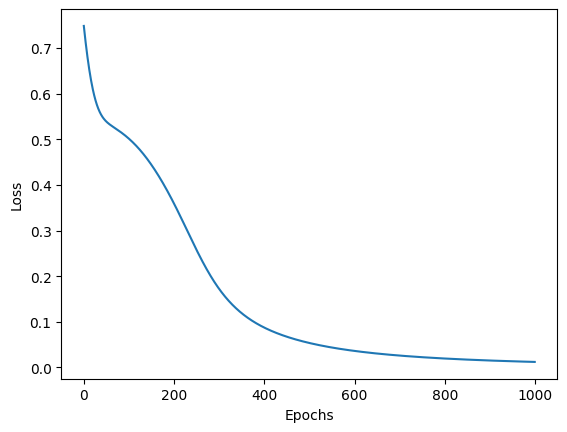

Training Losses are 
          0
0  0.605421
1  0.597476
2  0.590140
3  0.583414
4  0.577299
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[3040    4]
 [   2  954]]
Accuracy: 0.9985, Precision: 0.9958, Recall: 0.9979, F1-score: 0.9969

Test Data
Confusion Matrix for hiden layer 32 and 64
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979



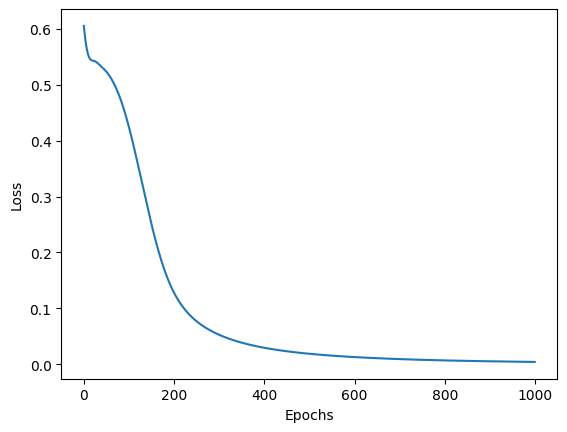

Training Losses are 
          0
0  0.686851
1  0.681855
2  0.676962
3  0.672175
4  0.667496
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[3039    5]
 [   4  952]]
Accuracy: 0.9978, Precision: 0.9948, Recall: 0.9958, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 64 and 8
[[3041    3]
 [   2  954]]
Accuracy: 0.9988, Precision: 0.9969, Recall: 0.9979, F1-score: 0.9974



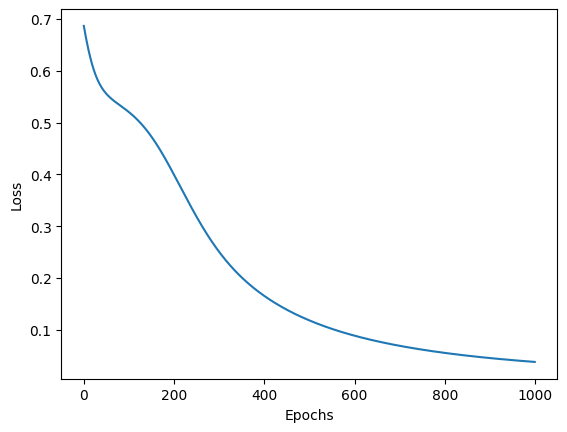

Training Losses are 
          0
0  0.815684
1  0.805659
2  0.795843
3  0.786242
4  0.776860
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[3039    5]
 [   3  953]]
Accuracy: 0.9980, Precision: 0.9948, Recall: 0.9969, F1-score: 0.9958

Test Data
Confusion Matrix for hiden layer 64 and 16
[[3041    3]
 [   5  951]]
Accuracy: 0.9980, Precision: 0.9969, Recall: 0.9948, F1-score: 0.9958



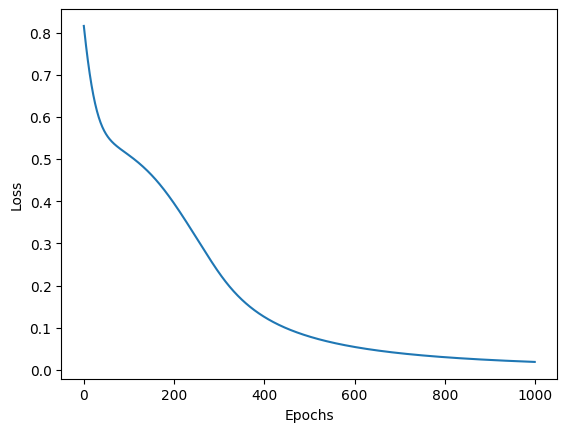

Training Losses are 
          0
0  0.676490
1  0.665926
2  0.655836
3  0.646228
4  0.637108
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[3040    4]
 [   2  954]]
Accuracy: 0.9985, Precision: 0.9958, Recall: 0.9979, F1-score: 0.9969

Test Data
Confusion Matrix for hiden layer 64 and 32
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979



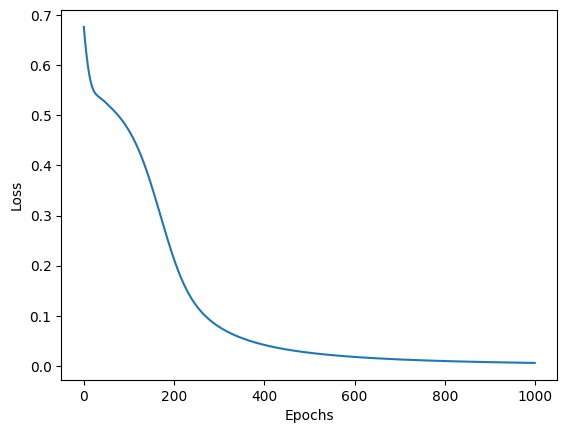

Training Losses are 
          0
0  0.663886
1  0.648458
2  0.634227
3  0.621197
4  0.609362
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979

Test Data
Confusion Matrix for hiden layer 64 and 64
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979



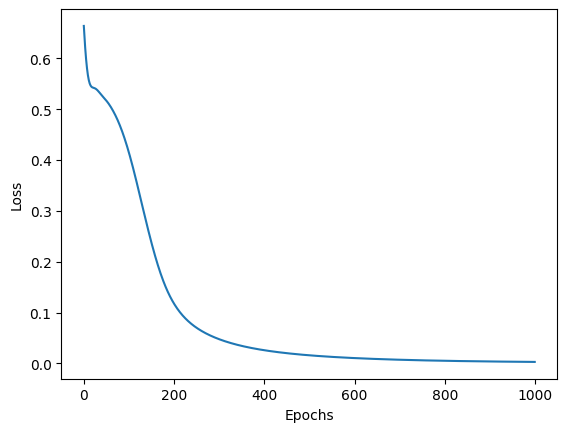

Best accuracy for test data is 0.999 for degree 32


In [32]:
nuerons = [8,16,32,64]
best_degree_3=0
best_accuracy_2=0

for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(34,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_2:
          best_accuracy_2=acc
          best_degree_4=nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_2} for degree {best_degree_4}")

In [33]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.786815
1  0.784551
2  0.782298
3  0.780056
4  0.777825
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3035    9]
 [  39  917]]
Accuracy: 0.9880, Precision: 0.9903, Recall: 0.9592, F1-score: 0.9745

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3034   10]
 [  23  933]]
Accuracy: 0.9918, Precision: 0.9894, Recall: 0.9759, F1-score: 0.9826



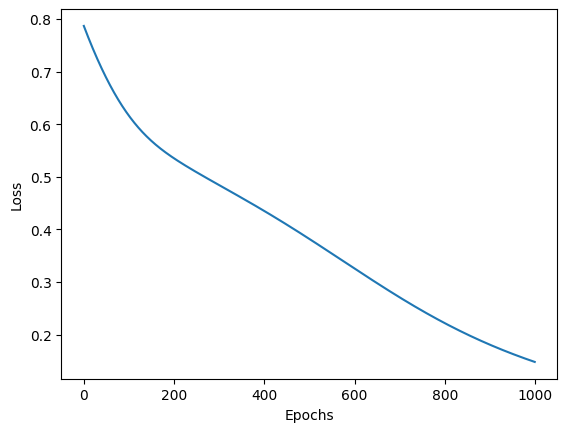

Training Losses are 
          0
0  0.754043
1  0.751891
2  0.749750
3  0.747619
4  0.745500
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3033   11]
 [  25  931]]
Accuracy: 0.9910, Precision: 0.9883, Recall: 0.9738, F1-score: 0.9810

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3029   15]
 [  20  936]]
Accuracy: 0.9912, Precision: 0.9842, Recall: 0.9791, F1-score: 0.9816



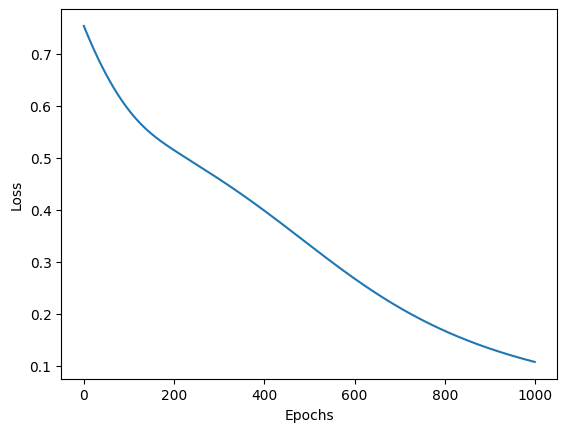

Training Losses are 
          0
0  0.654191
1  0.652414
2  0.650648
3  0.648895
4  0.647153
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3033   11]
 [  17  939]]
Accuracy: 0.9930, Precision: 0.9884, Recall: 0.9822, F1-score: 0.9853

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3030   14]
 [  16  940]]
Accuracy: 0.9925, Precision: 0.9853, Recall: 0.9833, F1-score: 0.9843



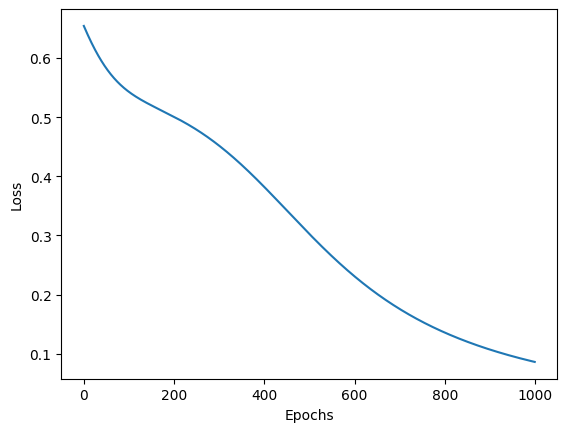

Training Losses are 
          0
0  0.657573
1  0.655767
2  0.653971
3  0.652188
4  0.650416
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[3035    9]
 [  28  928]]
Accuracy: 0.9908, Precision: 0.9904, Recall: 0.9707, F1-score: 0.9805

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[3033   11]
 [  21  935]]
Accuracy: 0.9920, Precision: 0.9884, Recall: 0.9780, F1-score: 0.9832



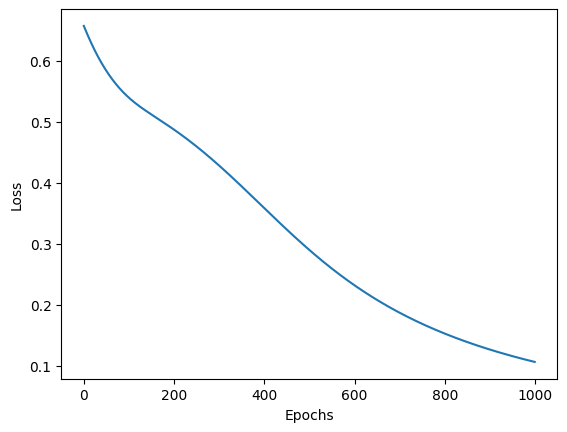

Training Losses are 
          0
0  0.618771
1  0.616537
2  0.614338
3  0.612174
4  0.610048
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[3035    9]
 [  10  946]]
Accuracy: 0.9952, Precision: 0.9906, Recall: 0.9895, F1-score: 0.9901

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[3033   11]
 [   9  947]]
Accuracy: 0.9950, Precision: 0.9885, Recall: 0.9906, F1-score: 0.9896



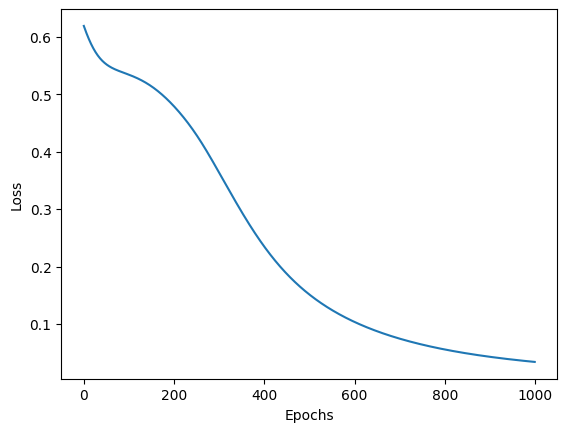

Training Losses are 
          0
0  0.681893
1  0.678859
2  0.675863
3  0.672904
4  0.669984
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[3035    9]
 [  12  944]]
Accuracy: 0.9948, Precision: 0.9906, Recall: 0.9874, F1-score: 0.9890

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[3030   14]
 [  12  944]]
Accuracy: 0.9935, Precision: 0.9854, Recall: 0.9874, F1-score: 0.9864



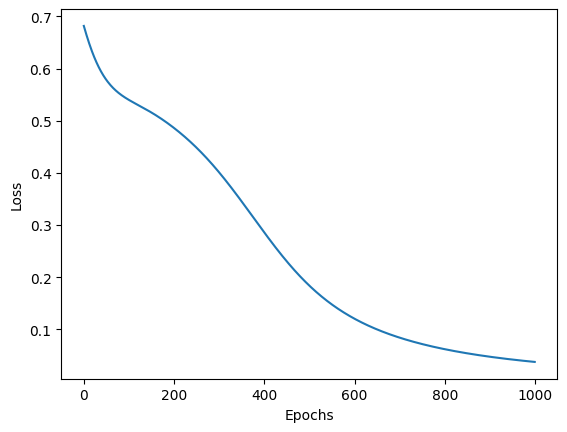

Training Losses are 
          0
0  0.649330
1  0.646860
2  0.644424
3  0.642021
4  0.639654
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[3035    9]
 [   9  947]]
Accuracy: 0.9955, Precision: 0.9906, Recall: 0.9906, F1-score: 0.9906

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[3035    9]
 [   8  948]]
Accuracy: 0.9958, Precision: 0.9906, Recall: 0.9916, F1-score: 0.9911



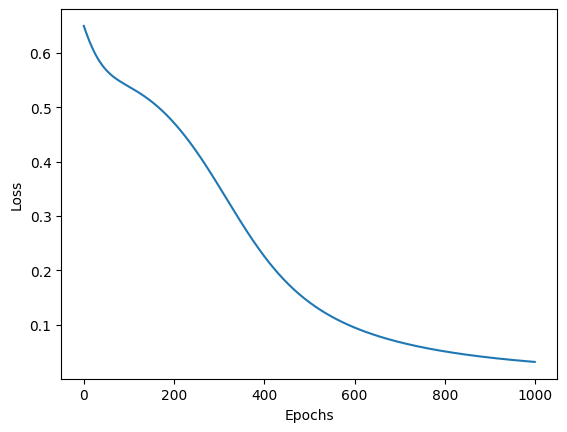

Training Losses are 
          0
0  0.620059
1  0.618077
2  0.616123
3  0.614197
4  0.612299
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[3035    9]
 [  10  946]]
Accuracy: 0.9952, Precision: 0.9906, Recall: 0.9895, F1-score: 0.9901

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[3034   10]
 [   9  947]]
Accuracy: 0.9952, Precision: 0.9896, Recall: 0.9906, F1-score: 0.9901



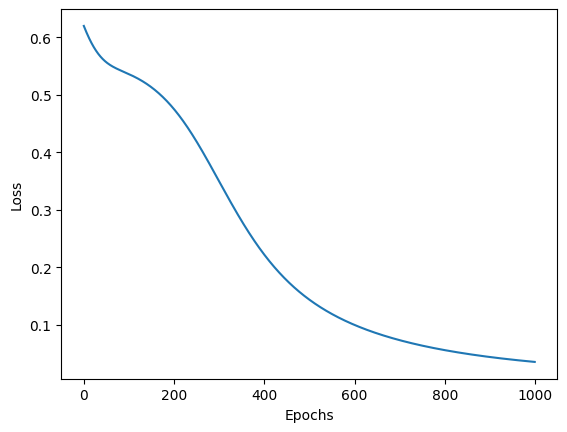

Training Losses are 
          0
0  0.576648
1  0.574204
2  0.571870
3  0.569648
4  0.567537
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[3038    6]
 [   7  949]]
Accuracy: 0.9968, Precision: 0.9937, Recall: 0.9927, F1-score: 0.9932

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[3036    8]
 [   7  949]]
Accuracy: 0.9962, Precision: 0.9916, Recall: 0.9927, F1-score: 0.9922



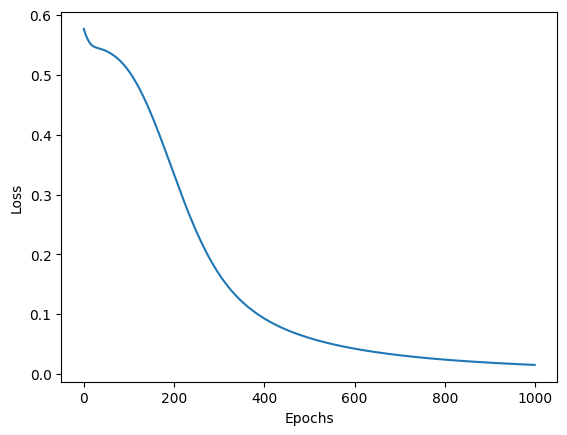

Training Losses are 
          0
0  0.730073
1  0.723942
2  0.717921
3  0.712010
4  0.706212
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[3035    9]
 [  12  944]]
Accuracy: 0.9948, Precision: 0.9906, Recall: 0.9874, F1-score: 0.9890

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[3033   11]
 [  12  944]]
Accuracy: 0.9942, Precision: 0.9885, Recall: 0.9874, F1-score: 0.9880



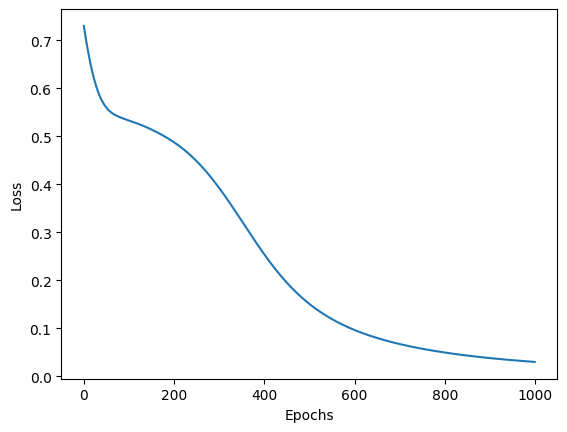

Training Losses are 
          0
0  0.713809
1  0.707951
2  0.702206
3  0.696575
4  0.691060
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[3037    7]
 [   8  948]]
Accuracy: 0.9962, Precision: 0.9927, Recall: 0.9916, F1-score: 0.9922

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[3036    8]
 [   7  949]]
Accuracy: 0.9962, Precision: 0.9916, Recall: 0.9927, F1-score: 0.9922



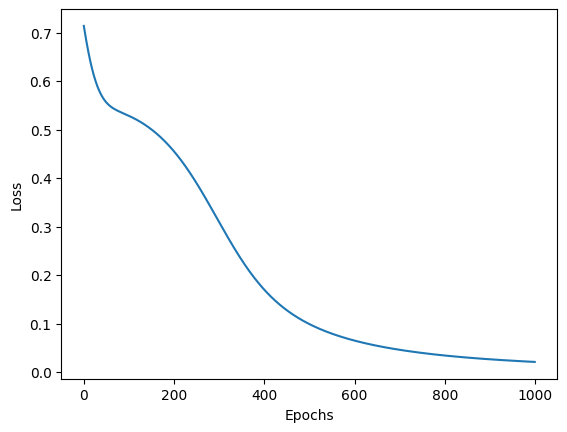

Training Losses are 
          0
0  0.738072
1  0.731646
2  0.725339
3  0.719153
4  0.713088
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[3035    9]
 [  10  946]]
Accuracy: 0.9952, Precision: 0.9906, Recall: 0.9895, F1-score: 0.9901

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[3033   11]
 [  12  944]]
Accuracy: 0.9942, Precision: 0.9885, Recall: 0.9874, F1-score: 0.9880



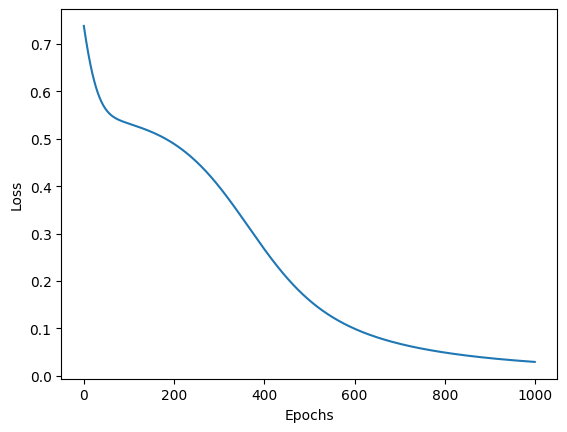

Training Losses are 
          0
0  0.701153
1  0.691034
2  0.681292
3  0.671933
4  0.662962
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[3037    7]
 [   7  949]]
Accuracy: 0.9965, Precision: 0.9927, Recall: 0.9927, F1-score: 0.9927

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[3037    7]
 [   7  949]]
Accuracy: 0.9965, Precision: 0.9927, Recall: 0.9927, F1-score: 0.9927



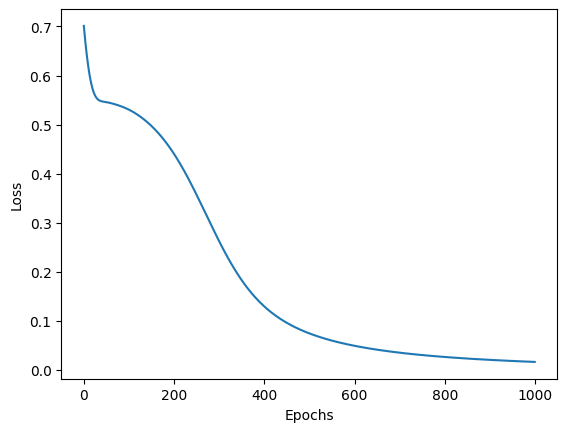

Training Losses are 
          0
0  0.734826
1  0.722969
2  0.711534
3  0.700526
4  0.689951
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[3038    6]
 [   7  949]]
Accuracy: 0.9968, Precision: 0.9937, Recall: 0.9927, F1-score: 0.9932

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[3036    8]
 [   7  949]]
Accuracy: 0.9962, Precision: 0.9916, Recall: 0.9927, F1-score: 0.9922



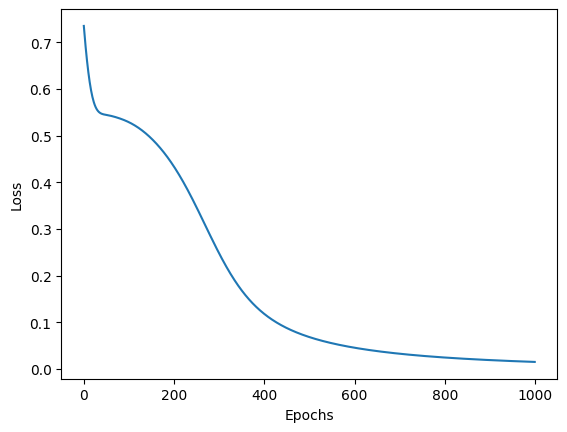

Training Losses are 
          0
0  0.691185
1  0.681763
2  0.672695
3  0.663984
4  0.655635
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[3039    5]
 [   7  949]]
Accuracy: 0.9970, Precision: 0.9948, Recall: 0.9927, F1-score: 0.9937

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[3038    6]
 [   7  949]]
Accuracy: 0.9968, Precision: 0.9937, Recall: 0.9927, F1-score: 0.9932



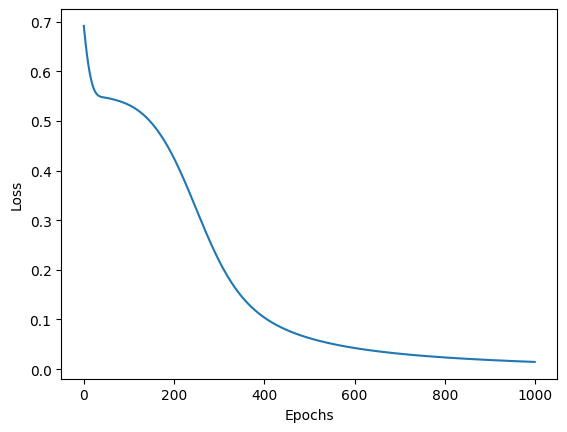

Training Losses are 
          0
0  0.726609
1  0.715483
2  0.704737
3  0.694378
4  0.684411
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[3038    6]
 [   7  949]]
Accuracy: 0.9968, Precision: 0.9937, Recall: 0.9927, F1-score: 0.9932

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[3037    7]
 [   7  949]]
Accuracy: 0.9965, Precision: 0.9927, Recall: 0.9927, F1-score: 0.9927



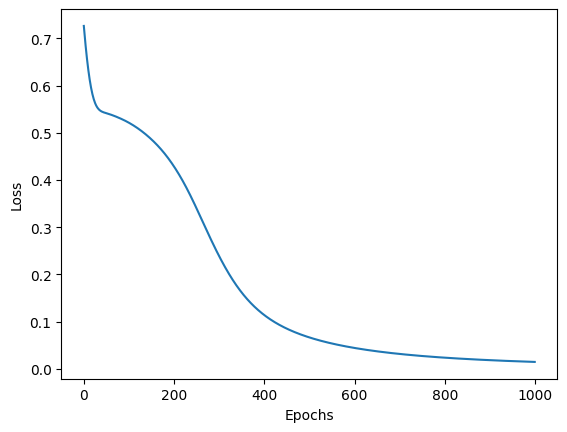

Training Losses are 
          0
0  0.748939
1  0.746219
2  0.743518
3  0.740837
4  0.738175
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[3034   10]
 [  13  943]]
Accuracy: 0.9942, Precision: 0.9895, Recall: 0.9864, F1-score: 0.9880

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[3031   13]
 [  10  946]]
Accuracy: 0.9942, Precision: 0.9864, Recall: 0.9895, F1-score: 0.9880



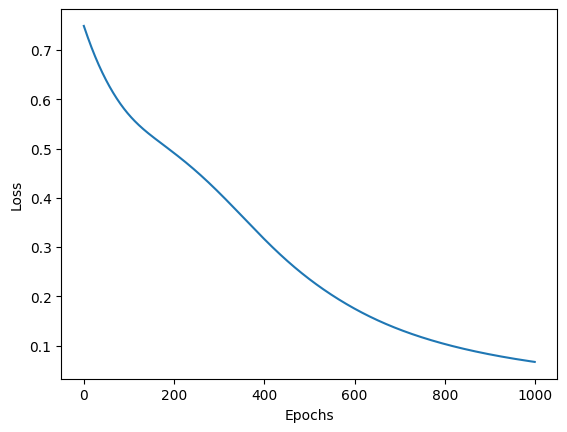

Training Losses are 
          0
0  0.679643
1  0.677612
2  0.675596
3  0.673597
4  0.671614
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[3035    9]
 [  12  944]]
Accuracy: 0.9948, Precision: 0.9906, Recall: 0.9874, F1-score: 0.9890

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[3033   11]
 [  12  944]]
Accuracy: 0.9942, Precision: 0.9885, Recall: 0.9874, F1-score: 0.9880



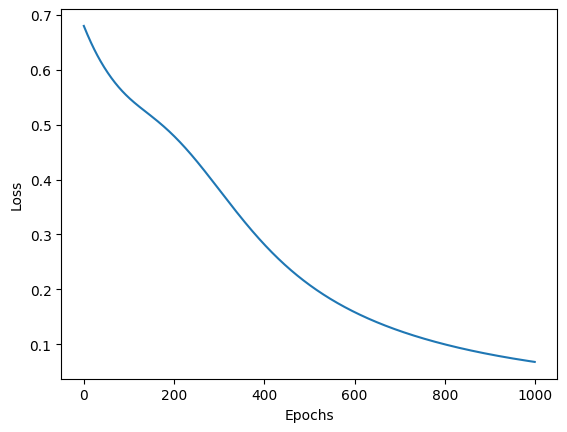

Training Losses are 
          0
0  0.672512
1  0.670466
2  0.668438
3  0.666427
4  0.664433
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[3035    9]
 [  10  946]]
Accuracy: 0.9952, Precision: 0.9906, Recall: 0.9895, F1-score: 0.9901

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[3034   10]
 [  12  944]]
Accuracy: 0.9945, Precision: 0.9895, Recall: 0.9874, F1-score: 0.9885



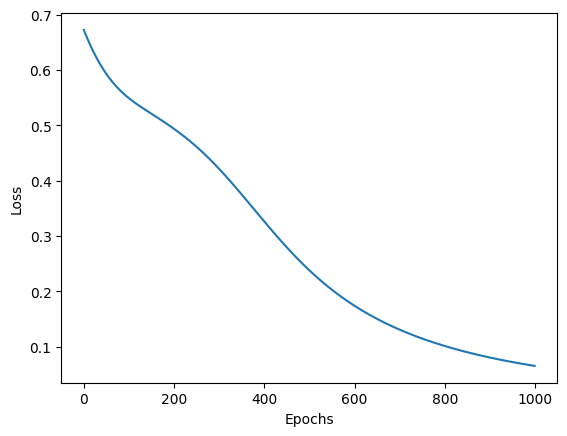

Training Losses are 
          0
0  0.880965
1  0.877459
2  0.873975
3  0.870511
4  0.867068
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[3031   13]
 [  17  939]]
Accuracy: 0.9925, Precision: 0.9863, Recall: 0.9822, F1-score: 0.9843

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[3026   18]
 [  18  938]]
Accuracy: 0.9910, Precision: 0.9812, Recall: 0.9812, F1-score: 0.9812



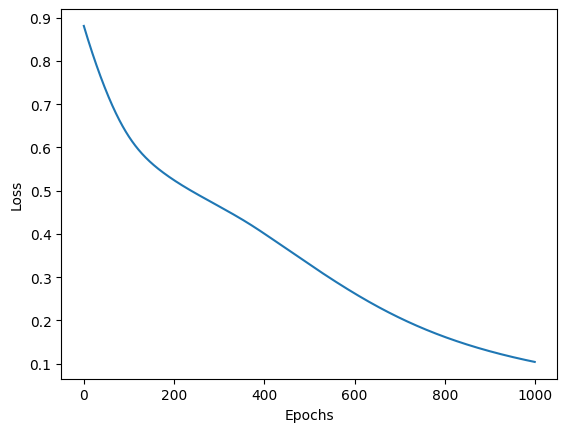

Training Losses are 
          0
0  0.710380
1  0.706928
2  0.703522
3  0.700161
4  0.696845
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[3036    8]
 [   7  949]]
Accuracy: 0.9962, Precision: 0.9916, Recall: 0.9927, F1-score: 0.9922

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[3035    9]
 [   9  947]]
Accuracy: 0.9955, Precision: 0.9906, Recall: 0.9906, F1-score: 0.9906



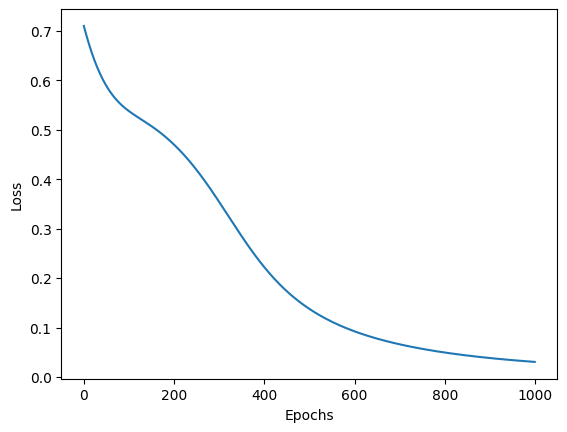

Training Losses are 
          0
0  0.688624
1  0.685087
2  0.681598
3  0.678158
4  0.674765
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[3037    7]
 [   7  949]]
Accuracy: 0.9965, Precision: 0.9927, Recall: 0.9927, F1-score: 0.9927

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[3036    8]
 [   7  949]]
Accuracy: 0.9962, Precision: 0.9916, Recall: 0.9927, F1-score: 0.9922



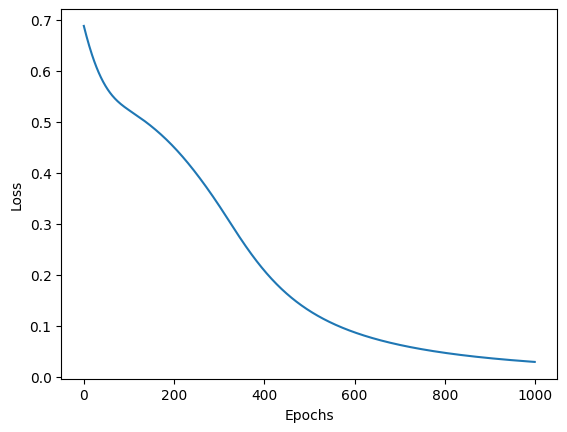

Training Losses are 
          0
0  0.776843
1  0.772626
2  0.768458
3  0.764338
4  0.760266
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[3036    8]
 [  10  946]]
Accuracy: 0.9955, Precision: 0.9916, Recall: 0.9895, F1-score: 0.9906

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[3035    9]
 [   9  947]]
Accuracy: 0.9955, Precision: 0.9906, Recall: 0.9906, F1-score: 0.9906



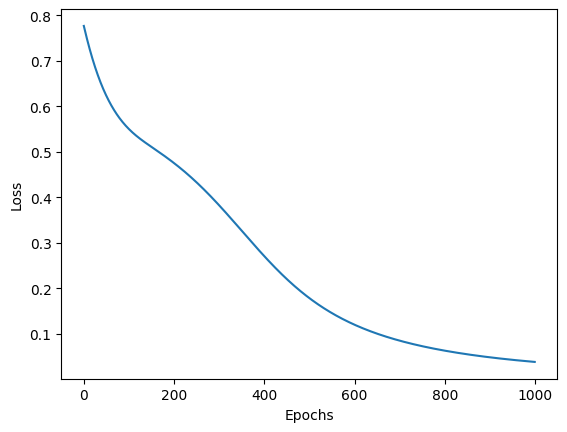

Training Losses are 
          0
0  0.655849
1  0.652861
2  0.649916
3  0.647016
4  0.644160
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[3037    7]
 [   7  949]]
Accuracy: 0.9965, Precision: 0.9927, Recall: 0.9927, F1-score: 0.9927

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[3036    8]
 [   7  949]]
Accuracy: 0.9962, Precision: 0.9916, Recall: 0.9927, F1-score: 0.9922



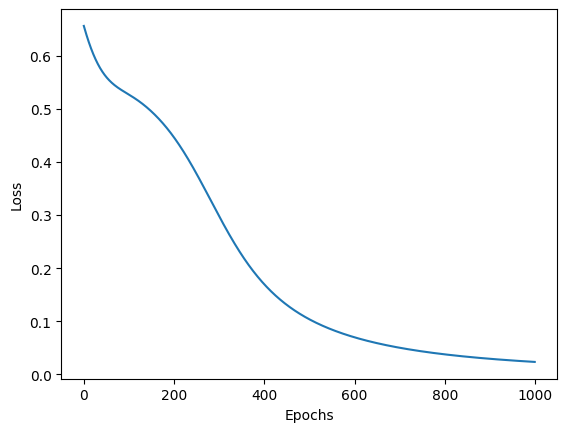

Training Losses are 
          0
0  0.575065
1  0.572525
2  0.570112
3  0.567827
4  0.565670
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[3039    5]
 [   4  952]]
Accuracy: 0.9978, Precision: 0.9948, Recall: 0.9958, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[3041    3]
 [   3  953]]
Accuracy: 0.9985, Precision: 0.9969, Recall: 0.9969, F1-score: 0.9969



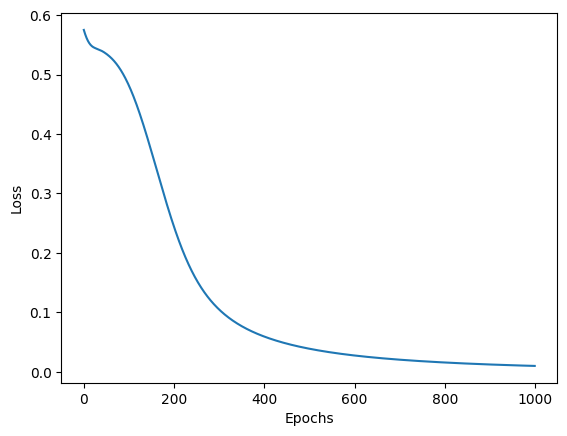

Training Losses are 
          0
0  0.614887
1  0.611085
2  0.607397
3  0.603827
4  0.600376
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[3039    5]
 [   4  952]]
Accuracy: 0.9978, Precision: 0.9948, Recall: 0.9958, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[3040    4]
 [   5  951]]
Accuracy: 0.9978, Precision: 0.9958, Recall: 0.9948, F1-score: 0.9953



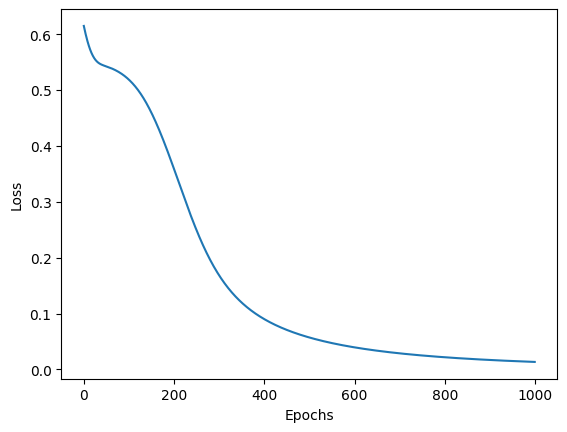

Training Losses are 
          0
0  0.677877
1  0.672342
2  0.666928
3  0.661637
4  0.656471
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[3038    6]
 [   5  951]]
Accuracy: 0.9972, Precision: 0.9937, Recall: 0.9948, F1-score: 0.9942

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[3037    7]
 [   7  949]]
Accuracy: 0.9965, Precision: 0.9927, Recall: 0.9927, F1-score: 0.9927



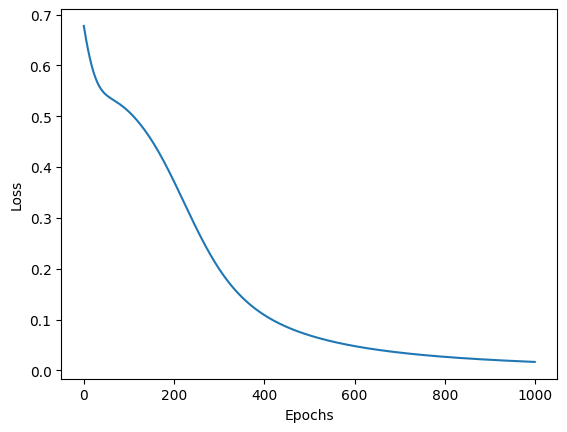

Training Losses are 
          0
0  0.729772
1  0.723288
2  0.716931
3  0.710705
4  0.704609
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[3038    6]
 [   7  949]]
Accuracy: 0.9968, Precision: 0.9937, Recall: 0.9927, F1-score: 0.9932

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[3036    8]
 [   8  948]]
Accuracy: 0.9960, Precision: 0.9916, Recall: 0.9916, F1-score: 0.9916



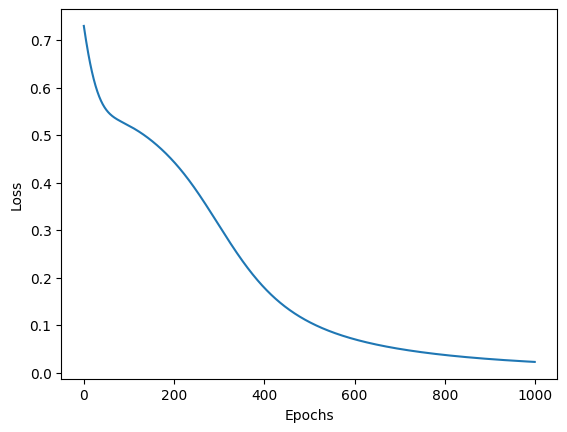

Training Losses are 
          0
0  0.763983
1  0.750456
2  0.737415
3  0.724868
4  0.712818
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[3039    5]
 [   4  952]]
Accuracy: 0.9978, Precision: 0.9948, Recall: 0.9958, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[3041    3]
 [   6  950]]
Accuracy: 0.9978, Precision: 0.9969, Recall: 0.9937, F1-score: 0.9953



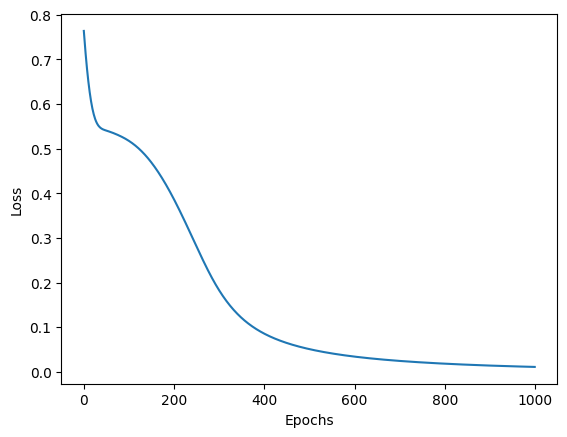

Training Losses are 
          0
0  0.735814
1  0.723207
2  0.711075
3  0.699427
4  0.688269
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[3039    5]
 [   4  952]]
Accuracy: 0.9978, Precision: 0.9948, Recall: 0.9958, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[3041    3]
 [   4  952]]
Accuracy: 0.9982, Precision: 0.9969, Recall: 0.9958, F1-score: 0.9963



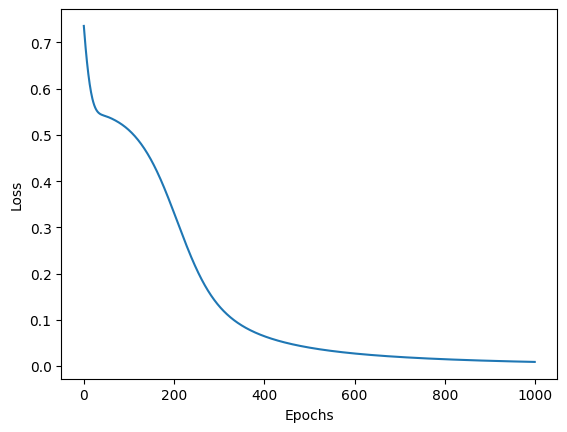

Training Losses are 
          0
0  0.632937
1  0.624663
2  0.616847
3  0.609491
4  0.602598
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[3038    6]
 [   4  952]]
Accuracy: 0.9975, Precision: 0.9937, Recall: 0.9958, F1-score: 0.9948

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[3041    3]
 [   3  953]]
Accuracy: 0.9985, Precision: 0.9969, Recall: 0.9969, F1-score: 0.9969



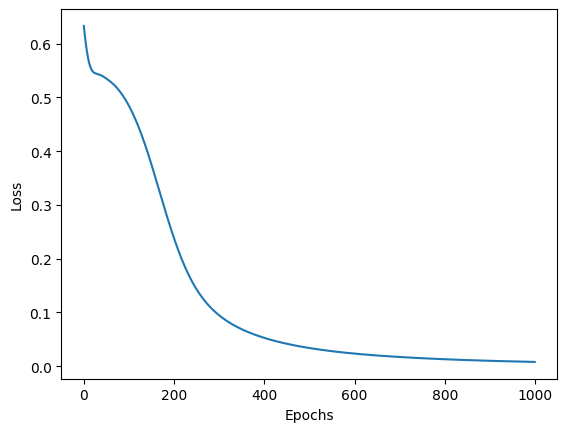

Training Losses are 
          0
0  0.793717
1  0.779273
2  0.765290
3  0.751774
4  0.738732
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[3039    5]
 [   4  952]]
Accuracy: 0.9978, Precision: 0.9948, Recall: 0.9958, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[3039    5]
 [   6  950]]
Accuracy: 0.9972, Precision: 0.9948, Recall: 0.9937, F1-score: 0.9942



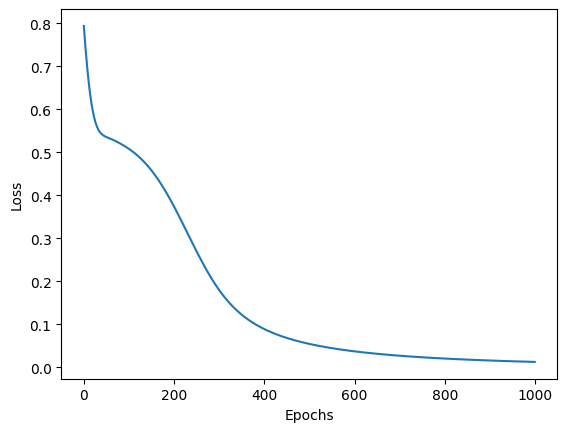

Training Losses are 
          0
0  0.756967
1  0.753385
2  0.749839
3  0.746331
4  0.742861
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[3038    6]
 [   7  949]]
Accuracy: 0.9968, Precision: 0.9937, Recall: 0.9927, F1-score: 0.9932

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[3036    8]
 [   7  949]]
Accuracy: 0.9962, Precision: 0.9916, Recall: 0.9927, F1-score: 0.9922



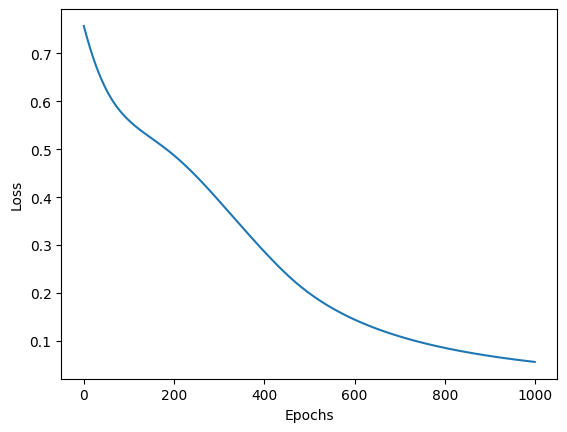

Training Losses are 
          0
0  0.627719
1  0.625543
2  0.623401
3  0.621293
4  0.619218
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[3039    5]
 [   5  951]]
Accuracy: 0.9975, Precision: 0.9948, Recall: 0.9948, F1-score: 0.9948

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[3039    5]
 [   6  950]]
Accuracy: 0.9972, Precision: 0.9948, Recall: 0.9937, F1-score: 0.9942



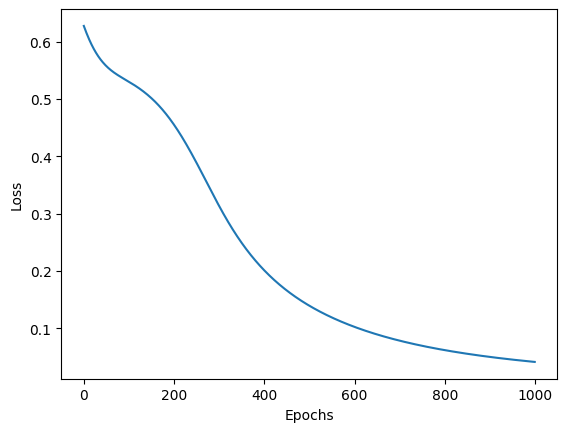

Training Losses are 
          0
0  0.655034
1  0.652387
2  0.649765
3  0.647169
4  0.644601
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[3038    6]
 [   5  951]]
Accuracy: 0.9972, Precision: 0.9937, Recall: 0.9948, F1-score: 0.9942

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[3038    6]
 [   7  949]]
Accuracy: 0.9968, Precision: 0.9937, Recall: 0.9927, F1-score: 0.9932



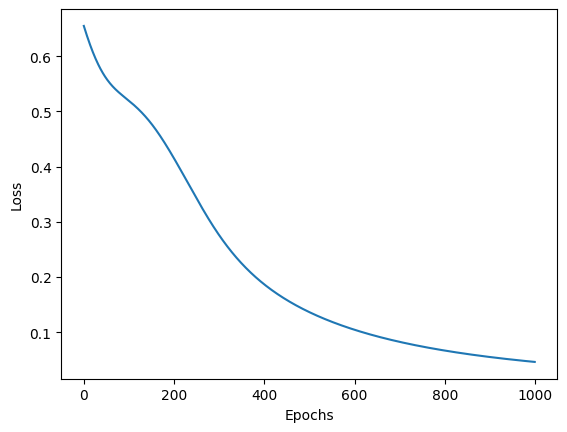

Training Losses are 
          0
0  0.848612
1  0.844575
2  0.840585
3  0.836641
4  0.832746
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[3037    7]
 [   9  947]]
Accuracy: 0.9960, Precision: 0.9927, Recall: 0.9906, F1-score: 0.9916

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[3036    8]
 [   9  947]]
Accuracy: 0.9958, Precision: 0.9916, Recall: 0.9906, F1-score: 0.9911



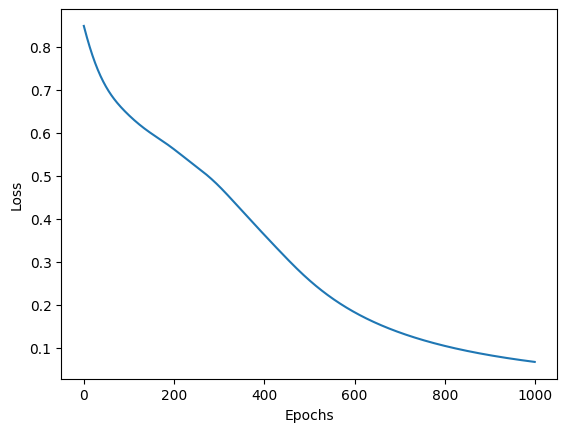

Training Losses are 
          0
0  0.775069
1  0.769140
2  0.763290
3  0.757519
4  0.751830
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[3039    5]
 [   4  952]]
Accuracy: 0.9978, Precision: 0.9948, Recall: 0.9958, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[3039    5]
 [   5  951]]
Accuracy: 0.9975, Precision: 0.9948, Recall: 0.9948, F1-score: 0.9948



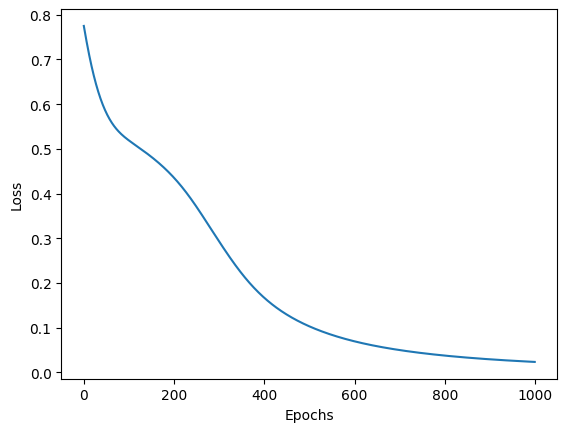

Training Losses are 
          0
0  0.792629
1  0.786672
2  0.780818
3  0.775067
4  0.769419
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[3037    7]
 [   8  948]]
Accuracy: 0.9962, Precision: 0.9927, Recall: 0.9916, F1-score: 0.9922

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[3036    8]
 [   9  947]]
Accuracy: 0.9958, Precision: 0.9916, Recall: 0.9906, F1-score: 0.9911



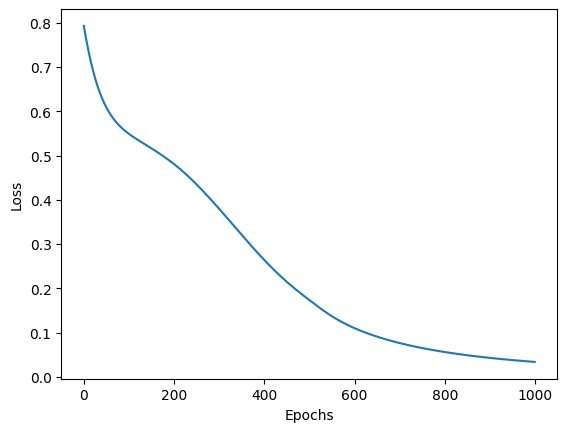

Training Losses are 
          0
0  0.717906
1  0.713601
2  0.709364
3  0.705194
4  0.701091
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[3039    5]
 [   4  952]]
Accuracy: 0.9978, Precision: 0.9948, Recall: 0.9958, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[3039    5]
 [   5  951]]
Accuracy: 0.9975, Precision: 0.9948, Recall: 0.9948, F1-score: 0.9948



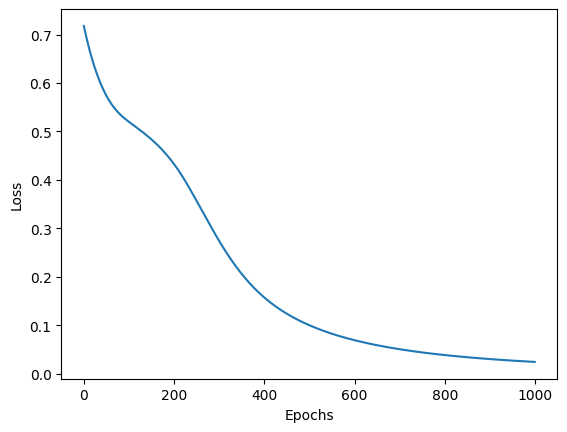

Training Losses are 
          0
0  0.662831
1  0.658303
2  0.653865
3  0.649517
4  0.645259
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[3039    5]
 [   4  952]]
Accuracy: 0.9978, Precision: 0.9948, Recall: 0.9958, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[3040    4]
 [   6  950]]
Accuracy: 0.9975, Precision: 0.9958, Recall: 0.9937, F1-score: 0.9948



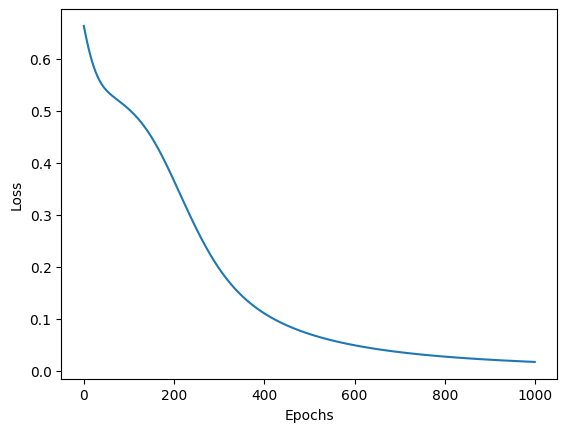

Training Losses are 
          0
0  0.852560
1  0.841703
2  0.831068
3  0.820659
4  0.810477
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[3039    5]
 [   4  952]]
Accuracy: 0.9978, Precision: 0.9948, Recall: 0.9958, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[3040    4]
 [   5  951]]
Accuracy: 0.9978, Precision: 0.9958, Recall: 0.9948, F1-score: 0.9953



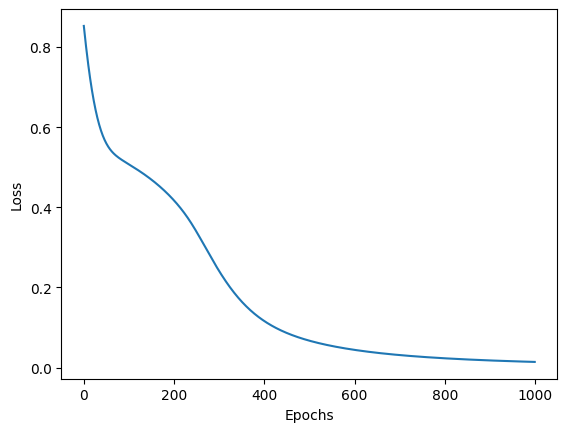

Training Losses are 
          0
0  0.706662
1  0.698361
2  0.690306
3  0.682498
4  0.674939
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[3039    5]
 [   4  952]]
Accuracy: 0.9978, Precision: 0.9948, Recall: 0.9958, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[3041    3]
 [   4  952]]
Accuracy: 0.9982, Precision: 0.9969, Recall: 0.9958, F1-score: 0.9963



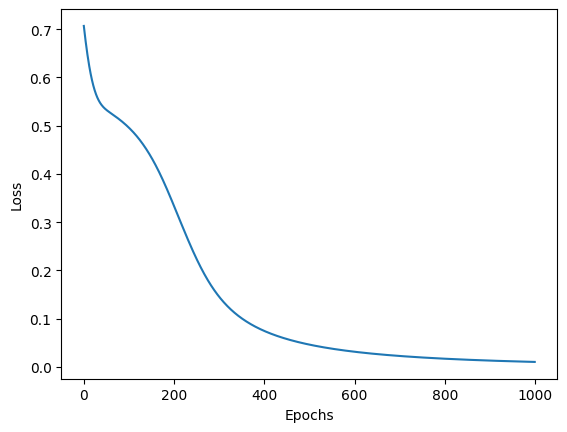

Training Losses are 
          0
0  0.786750
1  0.776640
2  0.766775
3  0.757157
4  0.747788
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[3039    5]
 [   4  952]]
Accuracy: 0.9978, Precision: 0.9948, Recall: 0.9958, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[3040    4]
 [   6  950]]
Accuracy: 0.9975, Precision: 0.9958, Recall: 0.9937, F1-score: 0.9948



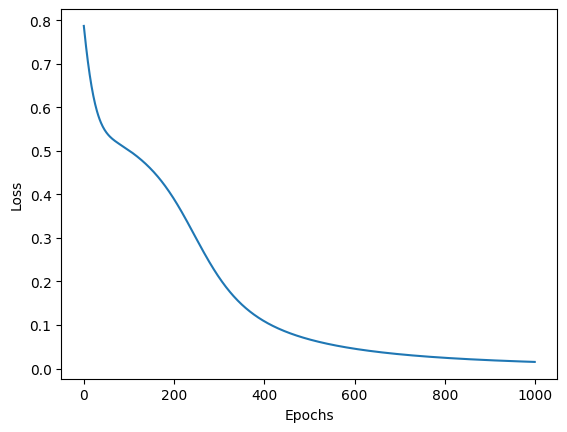

Training Losses are 
          0
0  0.929338
1  0.916360
2  0.903640
3  0.891181
4  0.878989
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[3039    5]
 [   4  952]]
Accuracy: 0.9978, Precision: 0.9948, Recall: 0.9958, F1-score: 0.9953

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[3039    5]
 [   6  950]]
Accuracy: 0.9972, Precision: 0.9948, Recall: 0.9937, F1-score: 0.9942



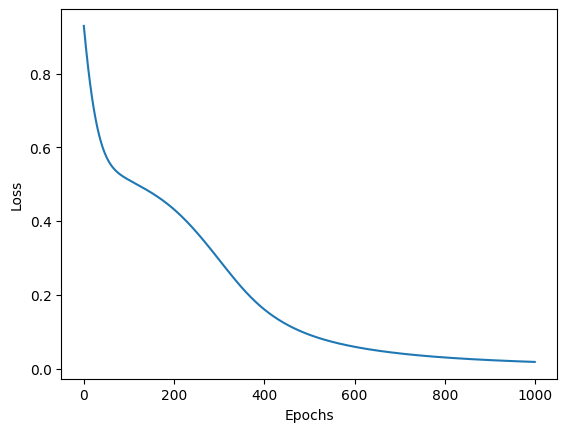

Training Losses are 
          0
0  0.660308
1  0.648505
2  0.637397
3  0.626991
4  0.617287
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[3040    4]
 [   2  954]]
Accuracy: 0.9985, Precision: 0.9958, Recall: 0.9979, F1-score: 0.9969

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979



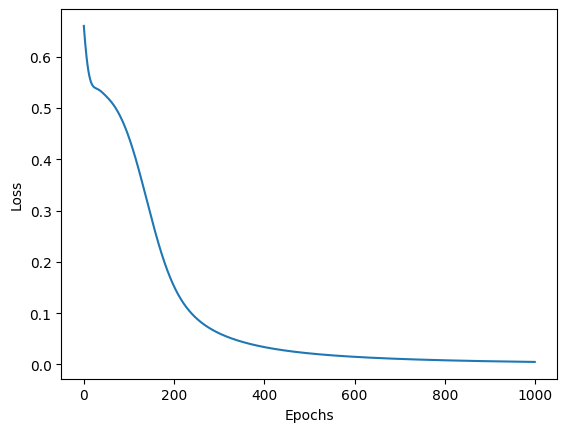

Training Losses are 
          0
0  0.649970
1  0.639338
2  0.629327
3  0.619942
4  0.611188
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[3040    4]
 [   2  954]]
Accuracy: 0.9985, Precision: 0.9958, Recall: 0.9979, F1-score: 0.9969

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979



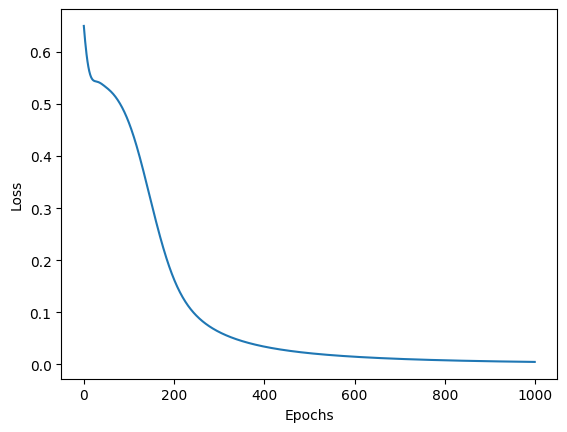

Training Losses are 
          0
0  0.841721
1  0.822269
2  0.803515
3  0.785475
4  0.768160
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[3039    5]
 [   3  953]]
Accuracy: 0.9980, Precision: 0.9948, Recall: 0.9969, F1-score: 0.9958

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[3041    3]
 [   4  952]]
Accuracy: 0.9982, Precision: 0.9969, Recall: 0.9958, F1-score: 0.9963



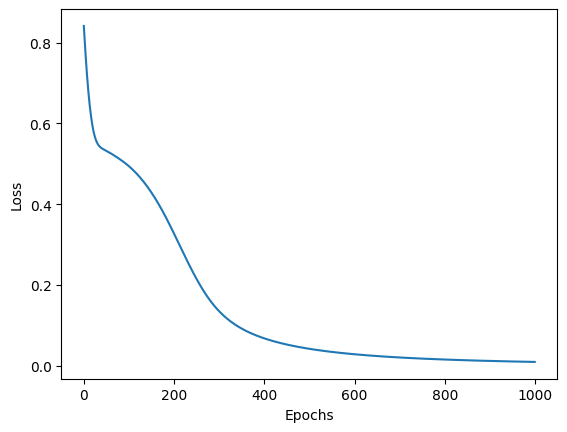

Training Losses are 
          0
0  0.727232
1  0.712907
2  0.699209
3  0.686149
4  0.673734
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[3039    5]
 [   3  953]]
Accuracy: 0.9980, Precision: 0.9948, Recall: 0.9969, F1-score: 0.9958

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979



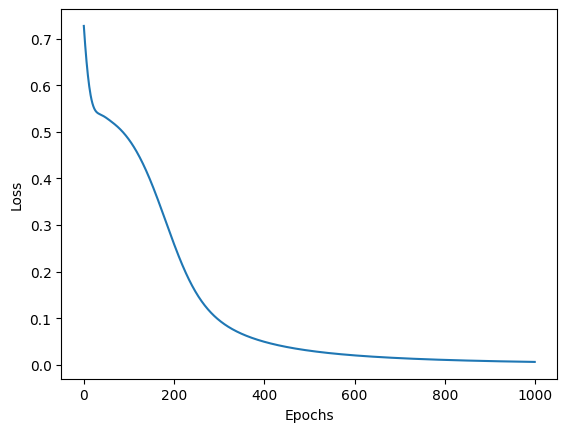

Training Losses are 
          0
0  0.604273
1  0.601708
2  0.599198
3  0.596742
4  0.594344
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[3039    5]
 [   3  953]]
Accuracy: 0.9980, Precision: 0.9948, Recall: 0.9969, F1-score: 0.9958

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979



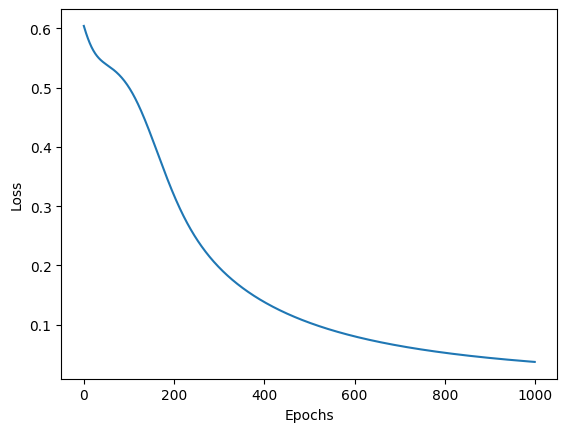

Training Losses are 
          0
0  0.889075
1  0.881204
2  0.873478
3  0.865899
4  0.858473
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[3038    6]
 [   5  951]]
Accuracy: 0.9972, Precision: 0.9937, Recall: 0.9948, F1-score: 0.9942

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[3038    6]
 [   6  950]]
Accuracy: 0.9970, Precision: 0.9937, Recall: 0.9937, F1-score: 0.9937



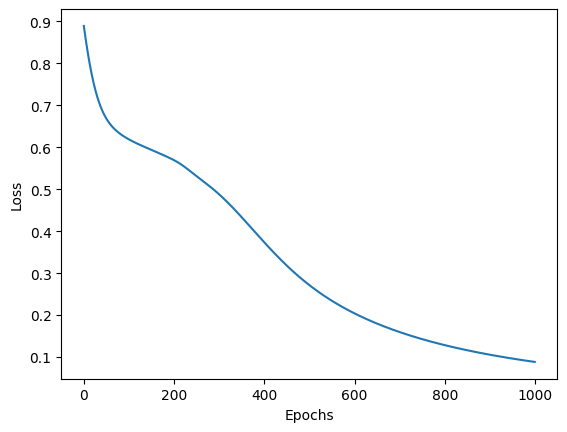

Training Losses are 
          0
0  0.626627
1  0.622523
2  0.618525
3  0.614636
4  0.610857
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[3040    4]
 [   3  953]]
Accuracy: 0.9982, Precision: 0.9958, Recall: 0.9969, F1-score: 0.9963

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[3041    3]
 [   2  954]]
Accuracy: 0.9988, Precision: 0.9969, Recall: 0.9979, F1-score: 0.9974



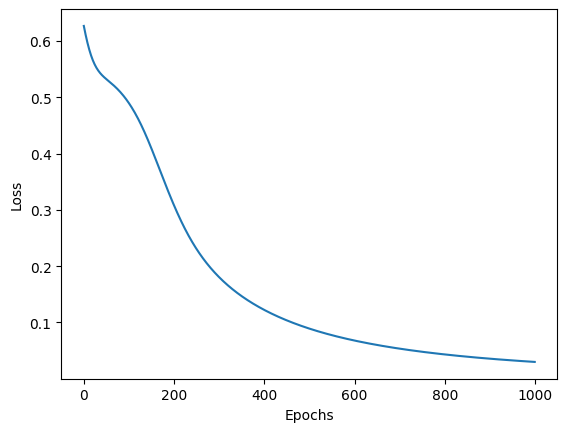

Training Losses are 
          0
0  0.855803
1  0.848920
2  0.842153
3  0.835508
4  0.828987
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[3038    6]
 [   4  952]]
Accuracy: 0.9975, Precision: 0.9937, Recall: 0.9958, F1-score: 0.9948

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[3037    7]
 [   5  951]]
Accuracy: 0.9970, Precision: 0.9927, Recall: 0.9948, F1-score: 0.9937



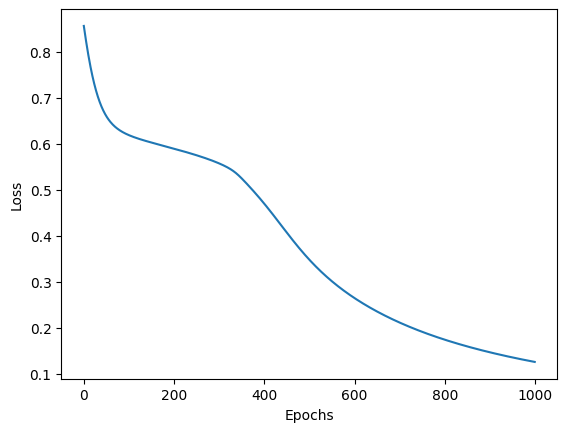

Training Losses are 
          0
0  0.600916
1  0.597161
2  0.593535
3  0.590040
4  0.586681
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[3040    4]
 [   2  954]]
Accuracy: 0.9985, Precision: 0.9958, Recall: 0.9979, F1-score: 0.9969

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979



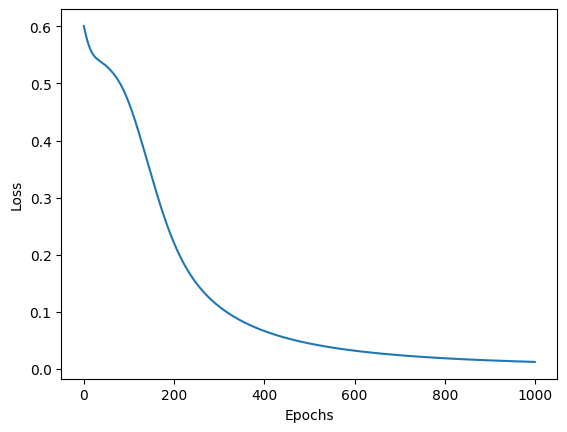

Training Losses are 
          0
0  0.627884
1  0.622477
2  0.617259
3  0.612233
4  0.607402
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[3040    4]
 [   2  954]]
Accuracy: 0.9985, Precision: 0.9958, Recall: 0.9979, F1-score: 0.9969

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979



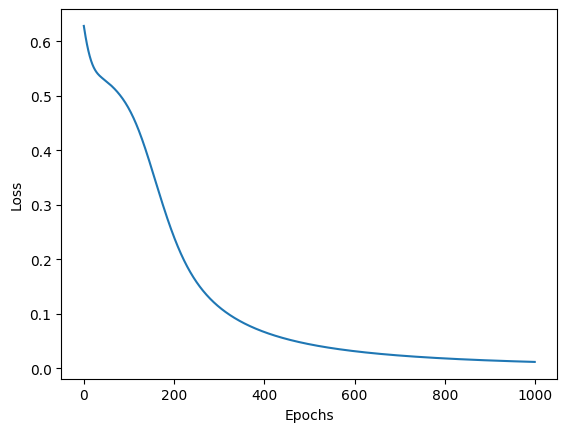

Training Losses are 
          0
0  0.710870
1  0.704414
2  0.698076
3  0.691860
4  0.685768
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[3039    5]
 [   3  953]]
Accuracy: 0.9980, Precision: 0.9948, Recall: 0.9969, F1-score: 0.9958

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[3040    4]
 [   2  954]]
Accuracy: 0.9985, Precision: 0.9958, Recall: 0.9979, F1-score: 0.9969



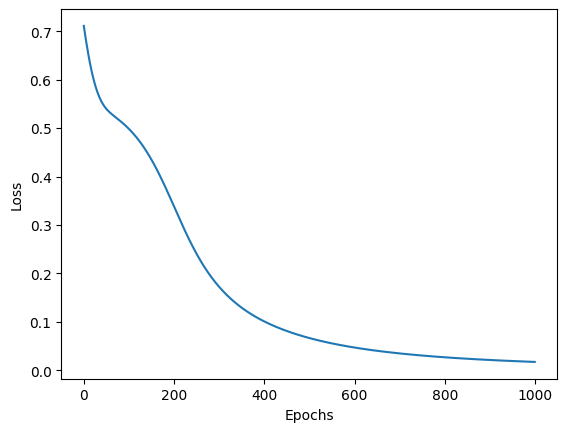

Training Losses are 
          0
0  0.737581
1  0.728555
2  0.719768
3  0.711227
4  0.702936
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[3039    5]
 [   3  953]]
Accuracy: 0.9980, Precision: 0.9948, Recall: 0.9969, F1-score: 0.9958

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[3041    3]
 [   2  954]]
Accuracy: 0.9988, Precision: 0.9969, Recall: 0.9979, F1-score: 0.9974



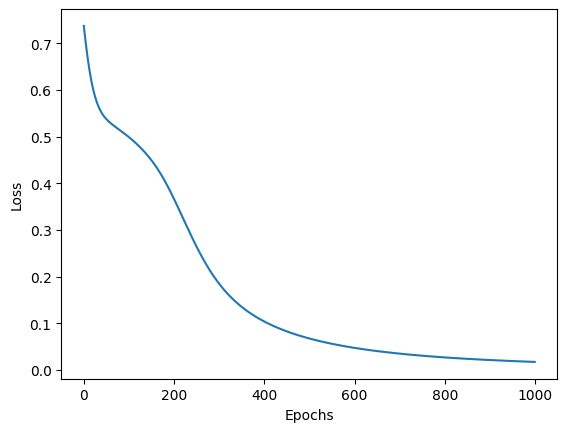

Training Losses are 
          0
0  0.732092
1  0.720290
2  0.708881
3  0.697876
4  0.687282
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[3040    4]
 [   3  953]]
Accuracy: 0.9982, Precision: 0.9958, Recall: 0.9969, F1-score: 0.9963

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979



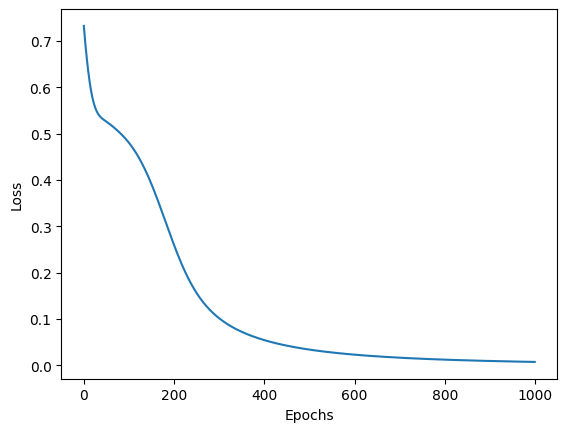

Training Losses are 
          0
0  0.588842
1  0.583989
2  0.579459
3  0.575256
4  0.571379
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[3040    4]
 [   2  954]]
Accuracy: 0.9985, Precision: 0.9958, Recall: 0.9979, F1-score: 0.9969

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979



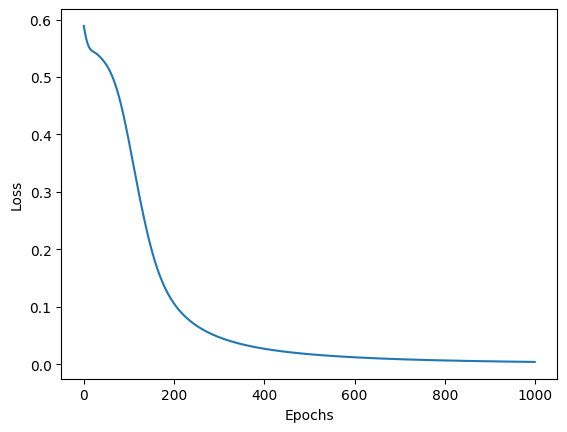

Training Losses are 
          0
0  0.609782
1  0.602370
2  0.595420
3  0.588940
4  0.582931
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[3040    4]
 [   2  954]]
Accuracy: 0.9985, Precision: 0.9958, Recall: 0.9979, F1-score: 0.9969

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979



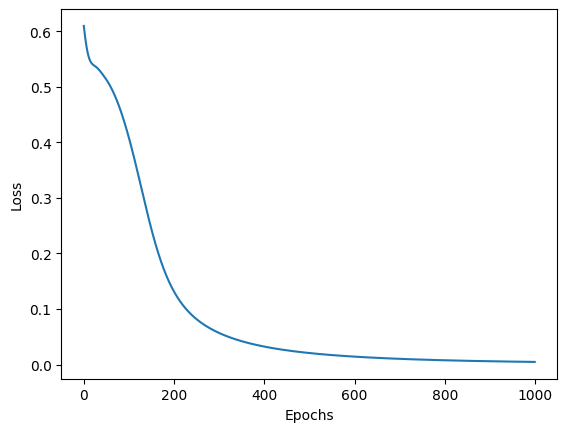

Training Losses are 
          0
0  0.692332
1  0.681524
2  0.671160
3  0.661246
4  0.651786
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[3039    5]
 [   3  953]]
Accuracy: 0.9980, Precision: 0.9948, Recall: 0.9969, F1-score: 0.9958

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979



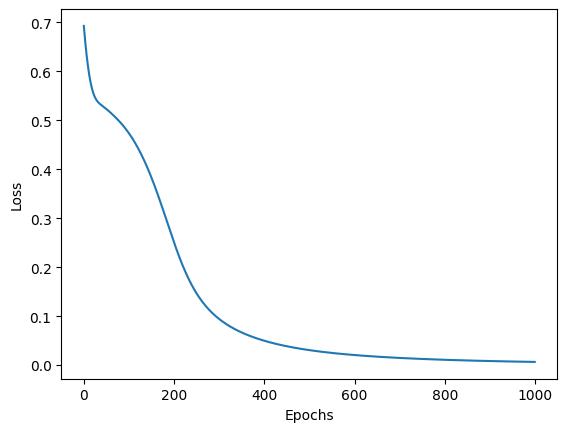

Training Losses are 
          0
0  0.826140
1  0.802264
2  0.779484
3  0.757832
4  0.737329
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[3040    4]
 [   3  953]]
Accuracy: 0.9982, Precision: 0.9958, Recall: 0.9969, F1-score: 0.9963

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979



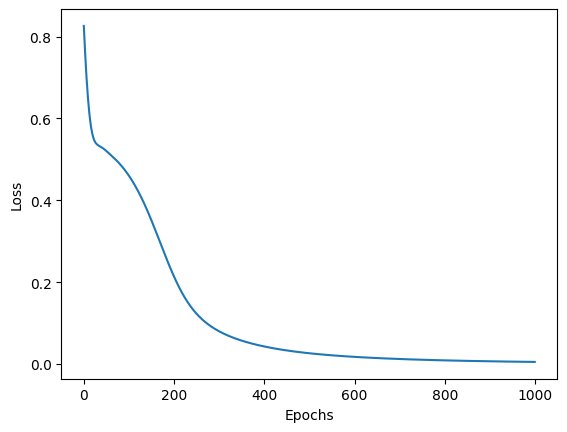

Training Losses are 
          0
0  0.727347
1  0.708432
2  0.690658
3  0.674043
4  0.658594
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[3040    4]
 [   3  953]]
Accuracy: 0.9982, Precision: 0.9958, Recall: 0.9969, F1-score: 0.9963

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979



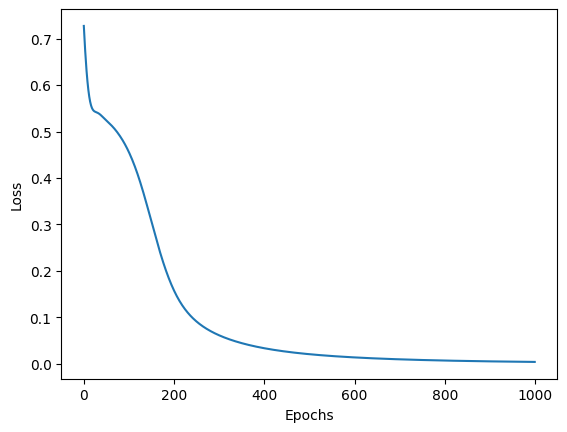

Training Losses are 
          0
0  0.680237
1  0.665068
2  0.650923
3  0.637802
4  0.625702
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979



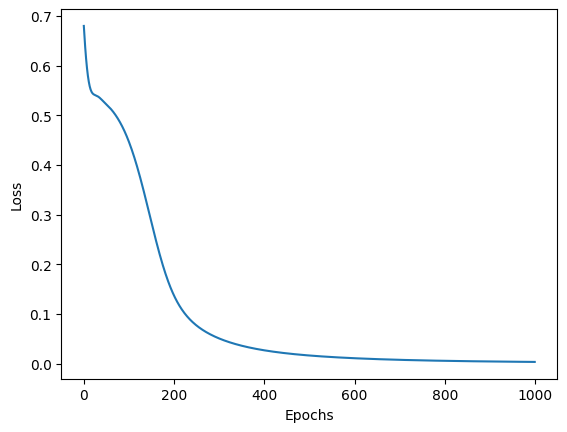

Training Losses are 
          0
0  0.618497
1  0.605866
2  0.594583
3  0.584644
4  0.576026
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[3041    3]
 [   2  954]]
Accuracy: 0.9988, Precision: 0.9969, Recall: 0.9979, F1-score: 0.9974

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[3042    2]
 [   2  954]]
Accuracy: 0.9990, Precision: 0.9979, Recall: 0.9979, F1-score: 0.9979



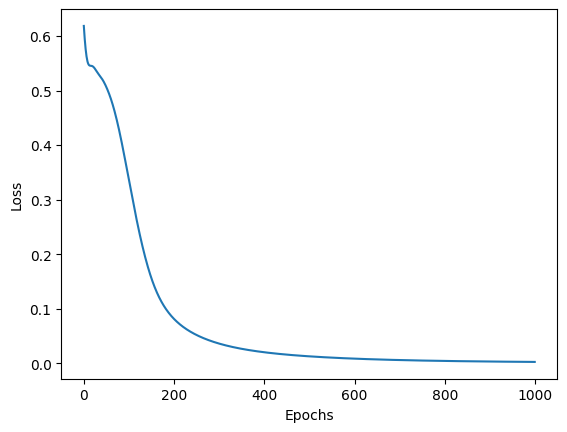

The best accuracy on test data is 0.999 for layers 32 , 64, 8


In [34]:
nuerons = [8,16,32,64]
best_score=0
layer1=0
layer2=0
layer3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = DoubleLayer(34,nueron,double_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      if acc > best_score:
          best_score=acc
          layer1=nueron
          layer2=double_nueron
          layer3=triple_nueron
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()
print(f"The best accuracy on test data is {best_score} for layers {layer1} , {layer2}, {layer3}")

Training Losses are 
          0
0  0.732364
1  0.729896
2  0.727463
3  0.725065
4  0.722701
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


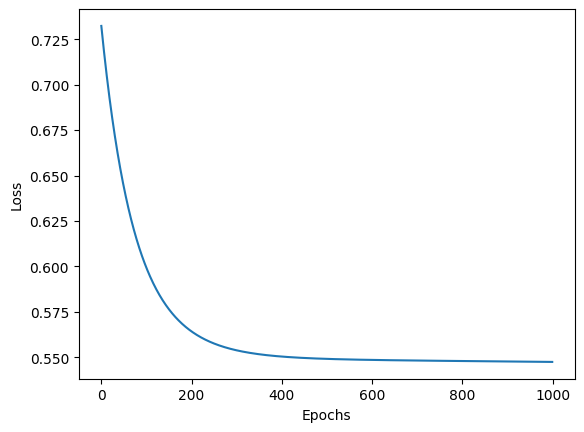

Training Losses are 
          0
0  0.580202
1  0.579725
2  0.579254
3  0.578791
4  0.578336
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


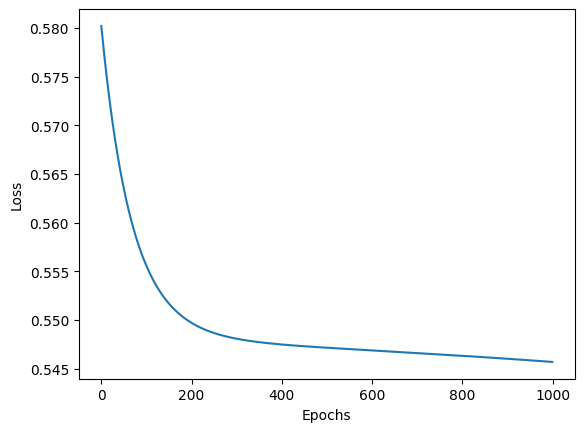

Training Losses are 
          0
0  0.718184
1  0.715570
2  0.712998
3  0.710468
4  0.707977
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


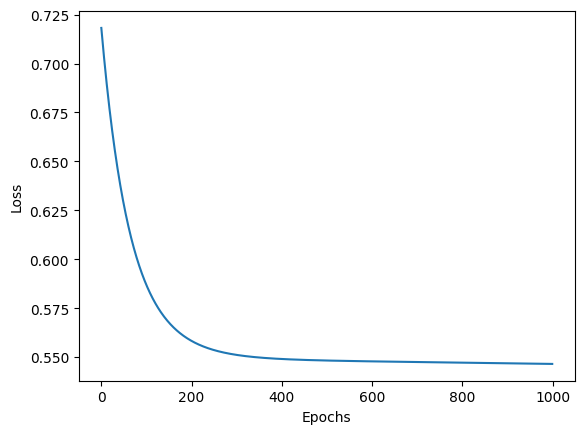

Training Losses are 
          0
0  0.694074
1  0.691888
2  0.689737
3  0.687621
4  0.685540
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


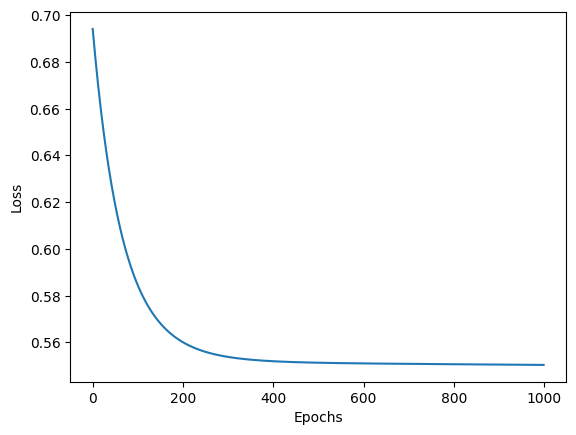

Training Losses are 
          0
0  0.794999
1  0.788241
2  0.781672
3  0.775287
4  0.769081
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


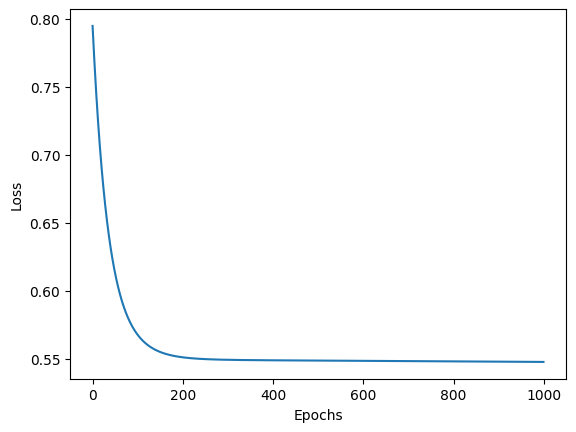

Training Losses are 
          0
0  0.699779
1  0.695758
2  0.691850
3  0.688053
4  0.684362
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


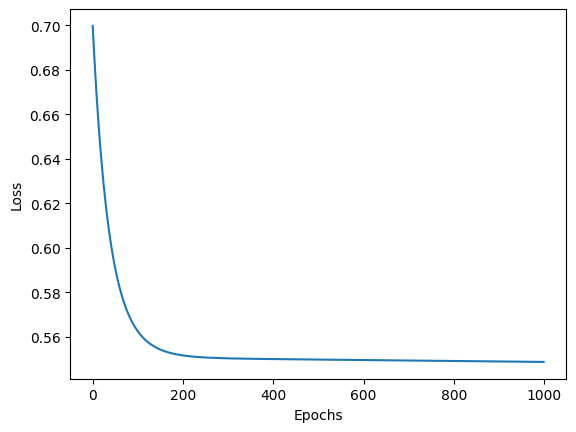

Training Losses are 
          0
0  0.693171
1  0.689987
2  0.686877
3  0.683838
4  0.680868
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


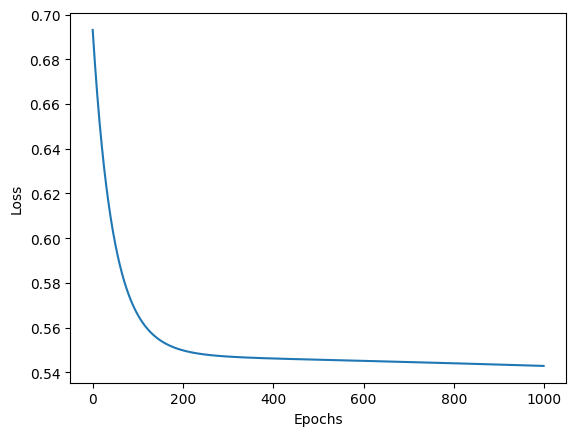

Training Losses are 
          0
0  0.771900
1  0.766768
2  0.761758
3  0.756867
4  0.752091
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


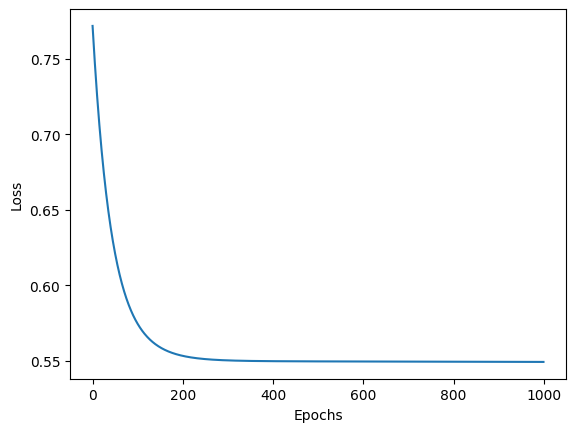

Training Losses are 
          0
0  0.732861
1  0.725037
2  0.717559
3  0.710411
4  0.703580
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


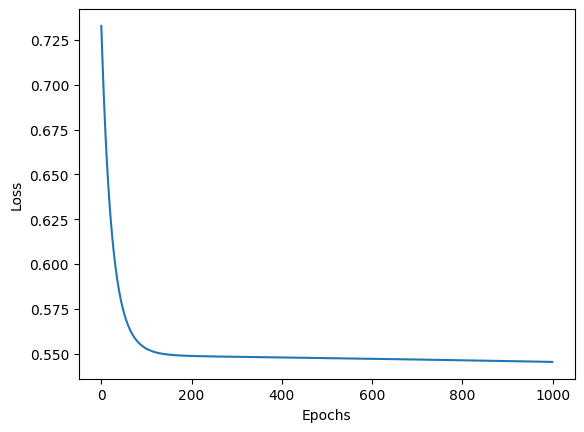

Training Losses are 
          0
0  0.872888
1  0.858967
2  0.845632
3  0.832862
4  0.820639
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


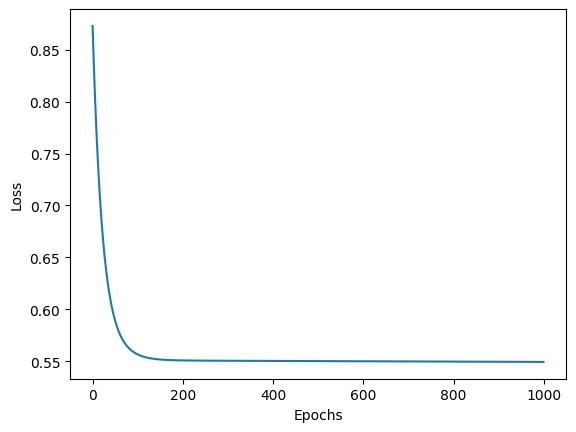

Training Losses are 
          0
0  0.674428
1  0.669229
2  0.664259
3  0.659508
4  0.654966
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


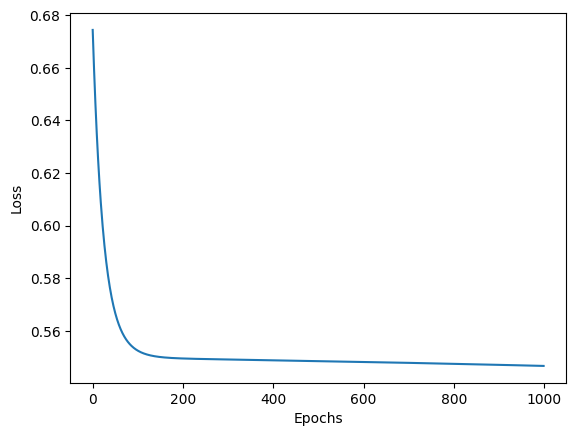

Training Losses are 
          0
0  0.666900
1  0.661916
2  0.657156
3  0.652611
4  0.648270
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


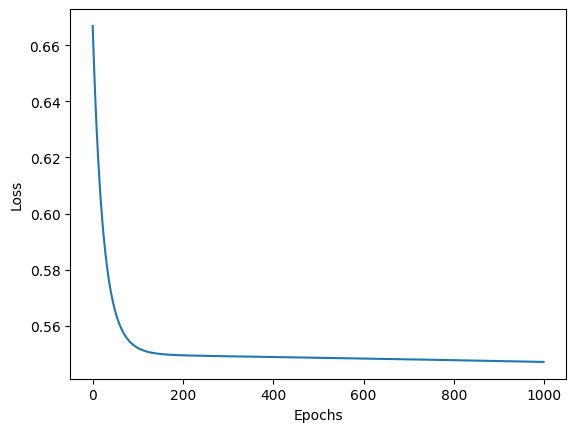

Training Losses are 
          0
0  0.687411
1  0.676108
2  0.665772
3  0.656319
4  0.647672
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


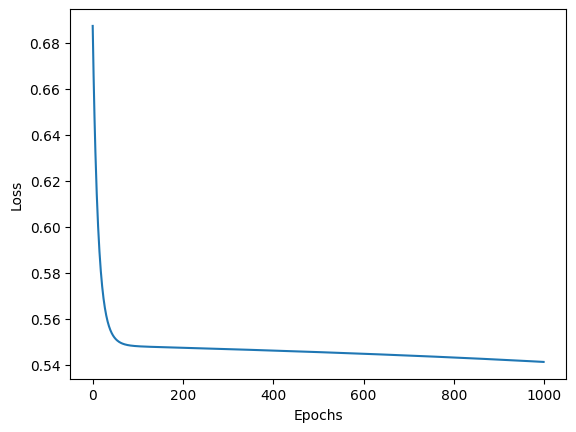

Training Losses are 
          0
0  0.664895
1  0.655526
2  0.646965
3  0.639140
4  0.631986
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


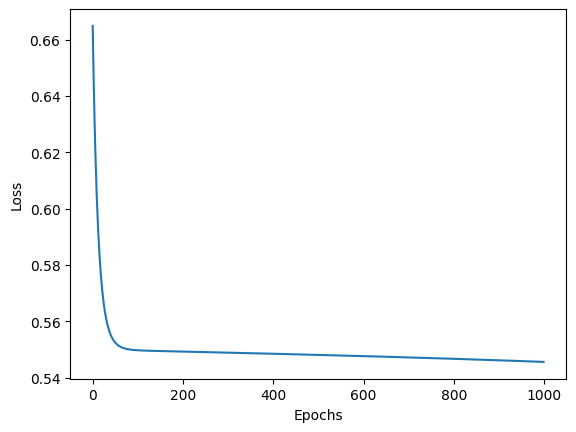

Training Losses are 
          0
0  0.898245
1  0.869326
2  0.842724
3  0.818290
4  0.795878
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


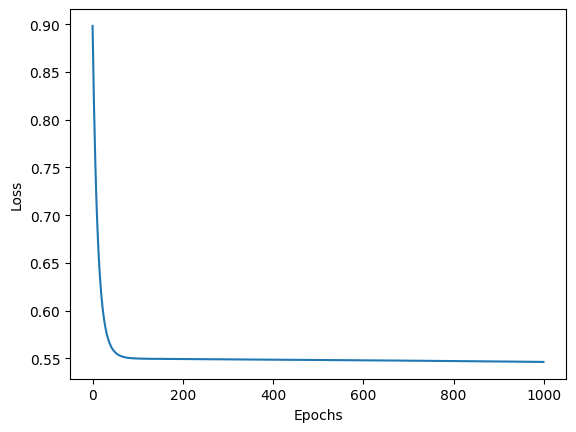

Training Losses are 
          0
0  0.751119
1  0.734584
2  0.719467
3  0.705649
4  0.693022
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


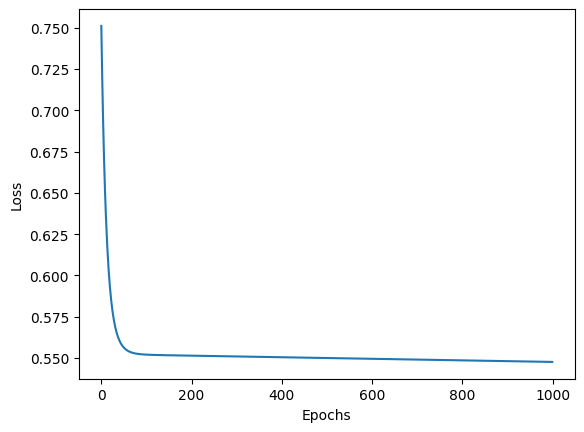

Training Losses are 
          0
0  0.620655
1  0.619751
2  0.618860
3  0.617982
4  0.617115
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


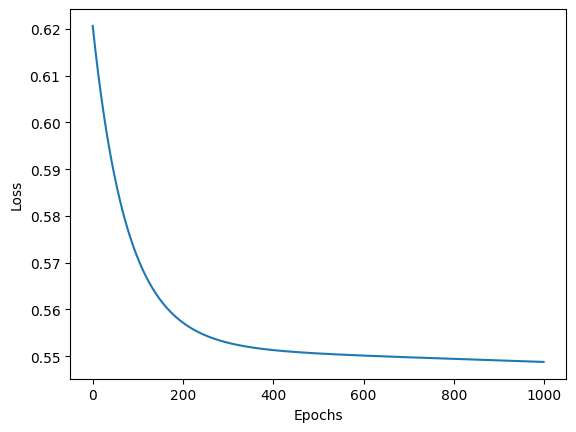

Training Losses are 
          0
0  0.782211
1  0.778620
2  0.775086
3  0.771607
4  0.768183
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


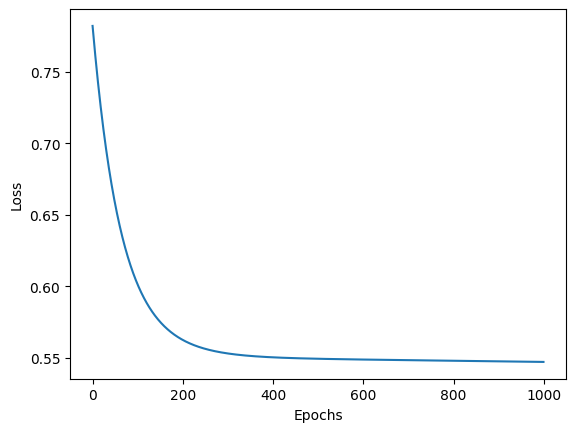

Training Losses are 
          0
0  0.718583
1  0.716054
2  0.713564
3  0.711113
4  0.708701
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


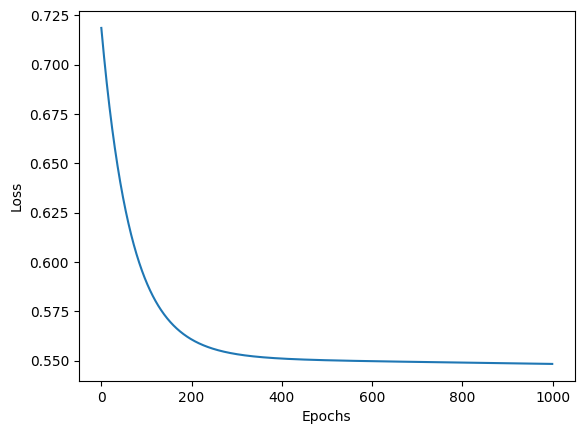

Training Losses are 
          0
0  0.718376
1  0.715899
2  0.713460
3  0.711058
4  0.708694
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


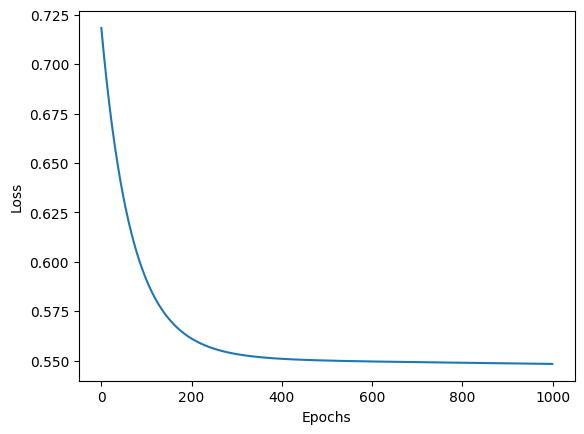

Training Losses are 
          0
0  0.667084
1  0.664176
2  0.661345
3  0.658586
4  0.655900
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


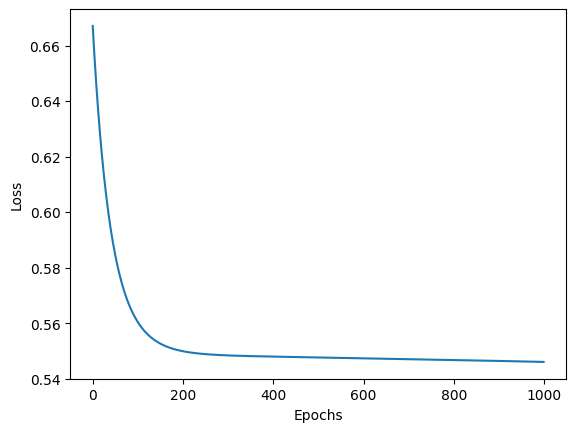

Training Losses are 
          0
0  0.720692
1  0.716153
2  0.711739
3  0.707447
4  0.703273
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


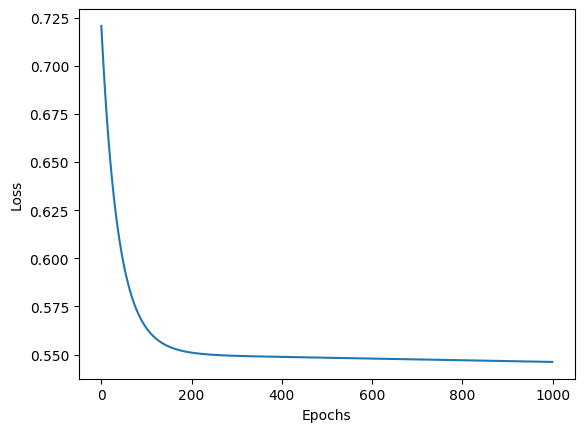

Training Losses are 
          0
0  0.665223
1  0.662712
2  0.660258
3  0.657858
4  0.655513
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


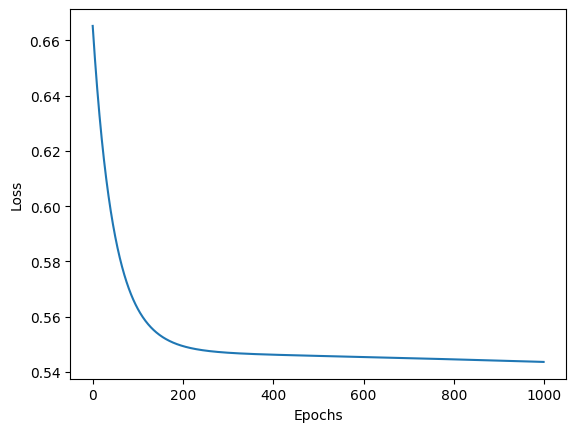

Training Losses are 
          0
0  0.664912
1  0.662254
2  0.659661
3  0.657133
4  0.654667
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


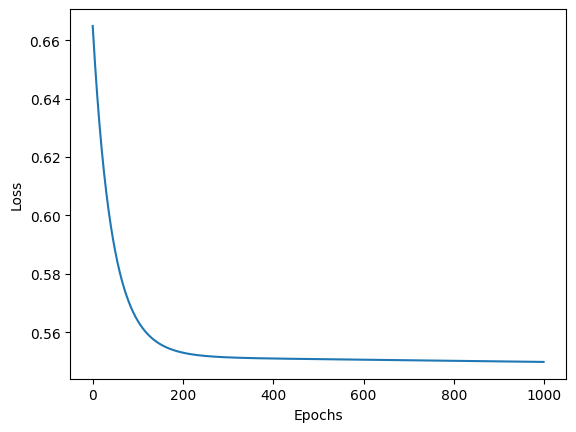

Training Losses are 
          0
0  0.650317
1  0.645622
2  0.641158
3  0.636912
4  0.632873
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


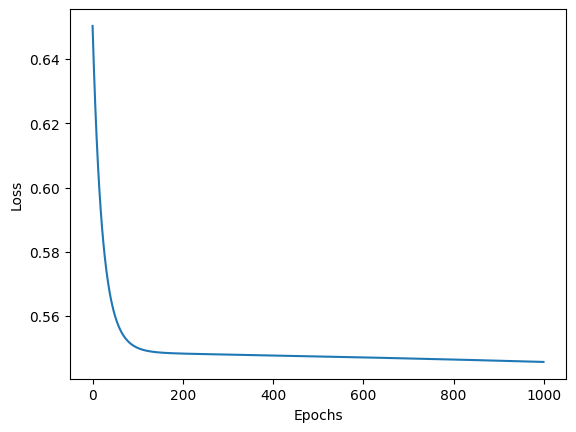

Training Losses are 
          0
0  0.629755
1  0.626143
2  0.622704
3  0.619429
4  0.616309
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


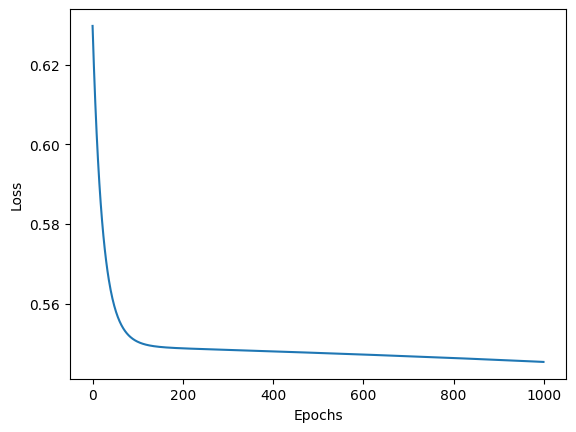

Training Losses are 
          0
0  0.745589
1  0.737238
2  0.729251
3  0.721613
4  0.714309
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


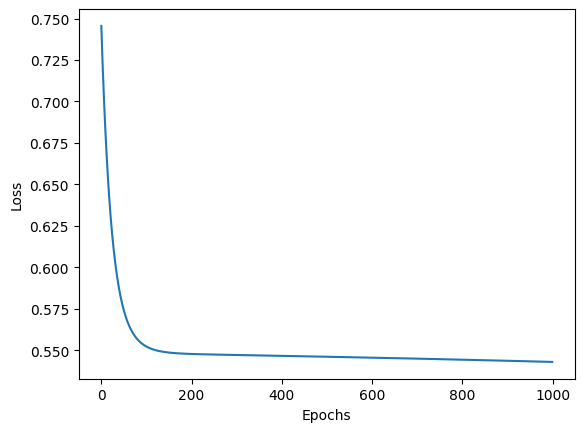

Training Losses are 
          0
0  0.751737
1  0.742680
2  0.734040
3  0.725800
4  0.717941
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


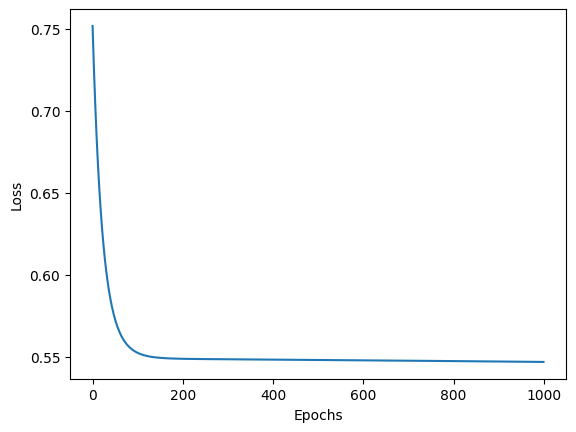

Training Losses are 
          0
0  0.729325
1  0.714829
2  0.701551
3  0.689391
4  0.678254
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


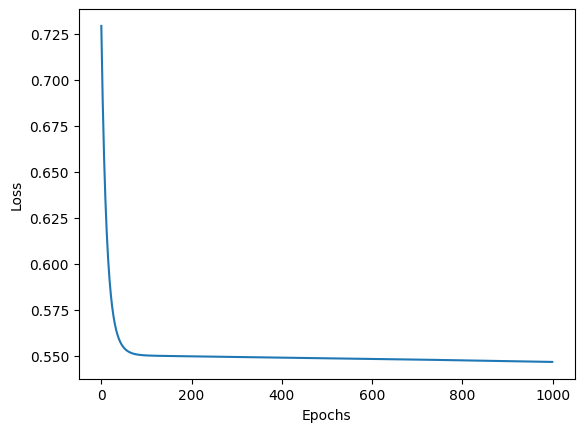

Training Losses are 
          0
0  0.745526
1  0.728269
2  0.712582
3  0.698327
4  0.685375
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


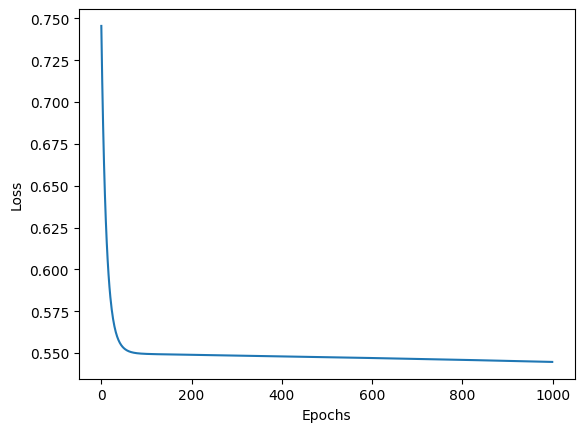

Training Losses are 
          0
0  0.714653
1  0.701343
2  0.689167
3  0.678030
4  0.667841
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


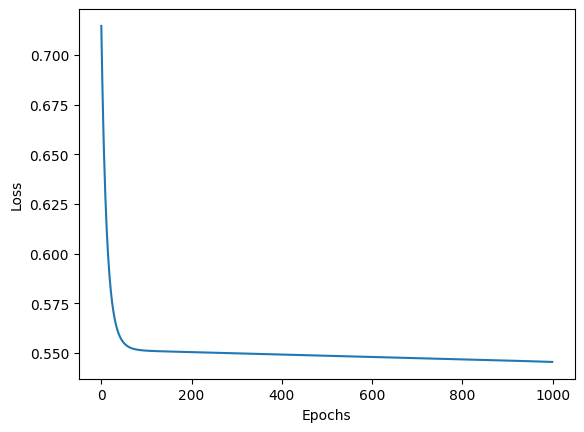

Training Losses are 
          0
0  0.619887
1  0.614618
2  0.609785
3  0.605351
4  0.601279
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


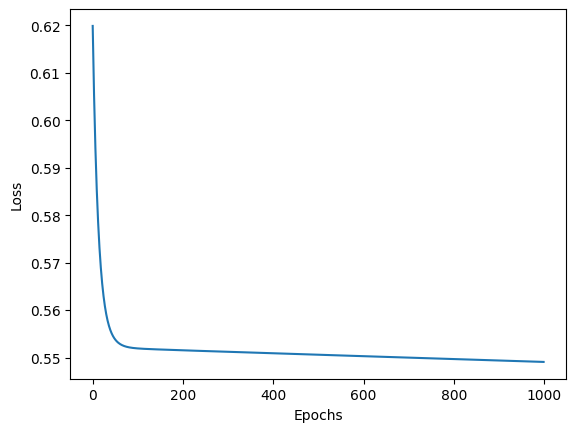

Training Losses are 
          0
0  0.724199
1  0.721184
2  0.718226
3  0.715322
4  0.712472
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


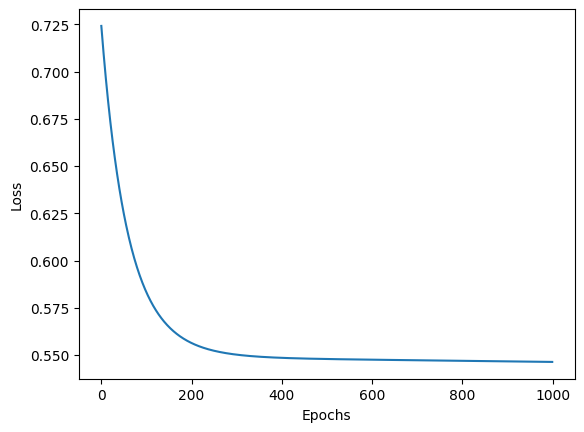

Training Losses are 
          0
0  0.620530
1  0.619493
2  0.618471
3  0.617465
4  0.616474
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


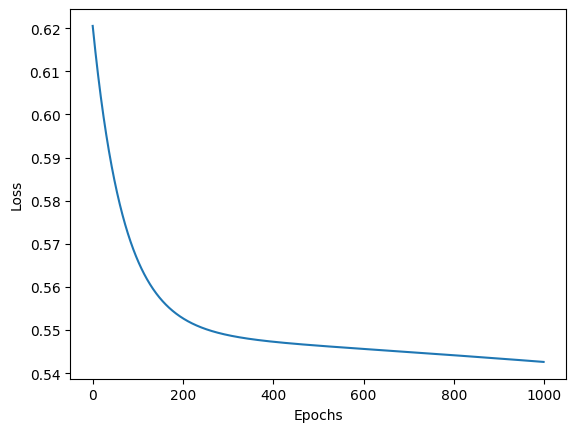

Training Losses are 
          0
0  0.650621
1  0.649212
2  0.647823
3  0.646455
4  0.645107
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


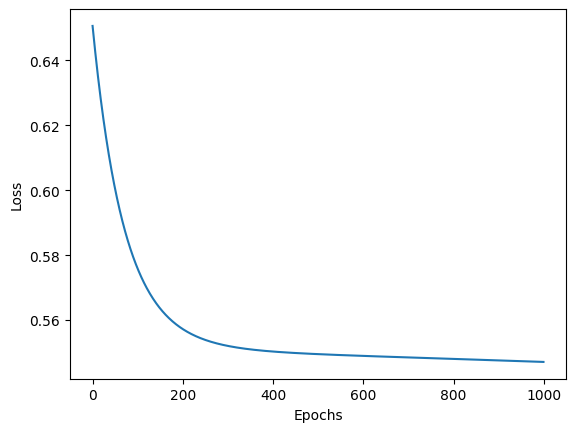

Training Losses are 
          0
0  0.712160
1  0.709583
2  0.707048
3  0.704554
4  0.702100
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


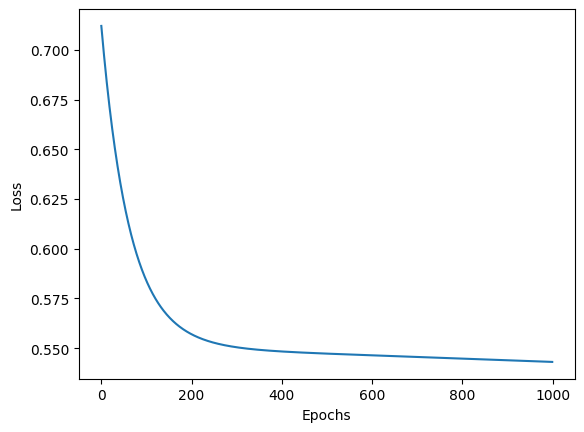

Training Losses are 
          0
0  0.747246
1  0.742464
2  0.737803
3  0.733258
4  0.728829
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


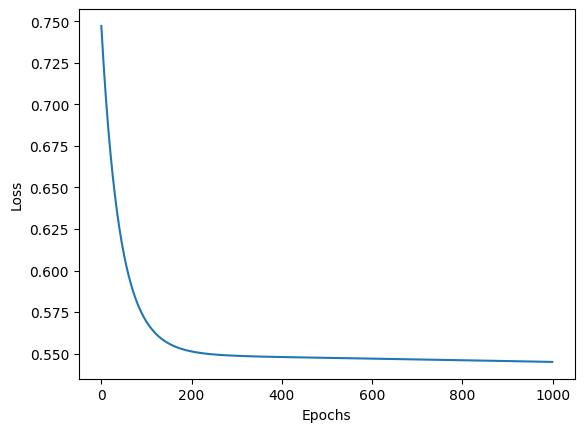

Training Losses are 
          0
0  0.723901
1  0.719298
2  0.714821
3  0.710468
4  0.706234
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


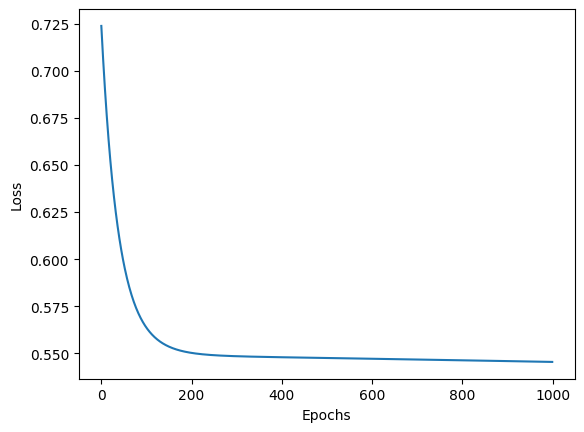

Training Losses are 
          0
0  0.657890
1  0.655369
2  0.652910
3  0.650511
4  0.648170
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


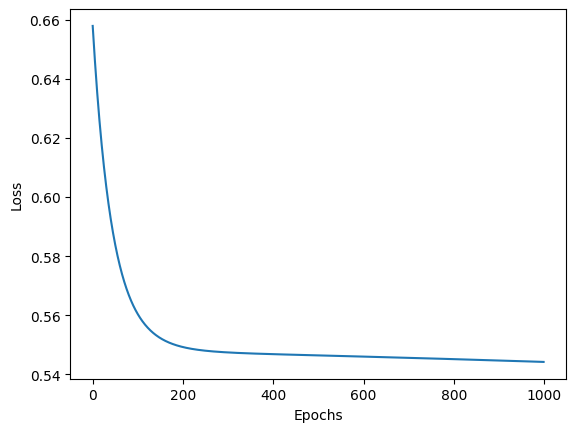

Training Losses are 
          0
0  0.672704
1  0.669859
2  0.667084
3  0.664378
4  0.661737
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


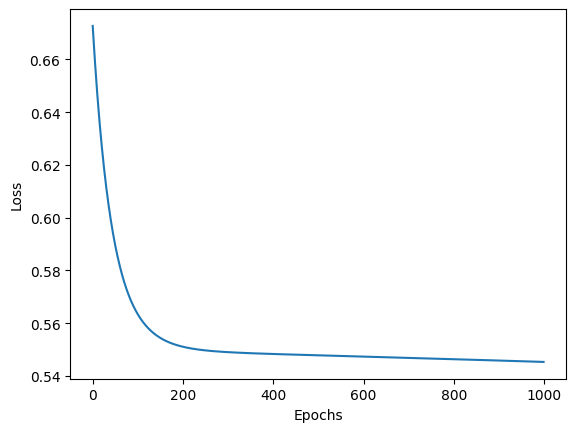

Training Losses are 
          0
0  0.740011
1  0.731712
2  0.723791
3  0.716231
4  0.709016
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


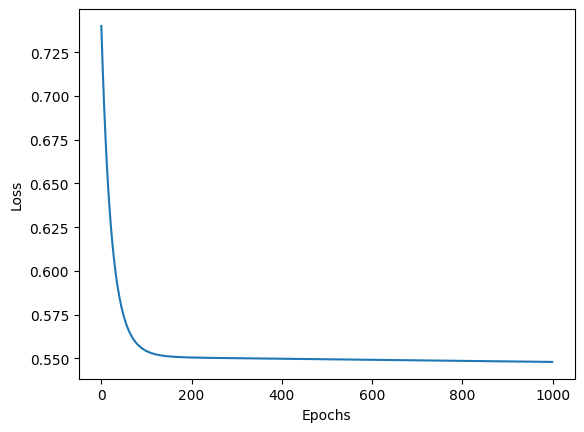

Training Losses are 
          0
0  0.689156
1  0.683344
2  0.677786
3  0.672469
4  0.667382
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


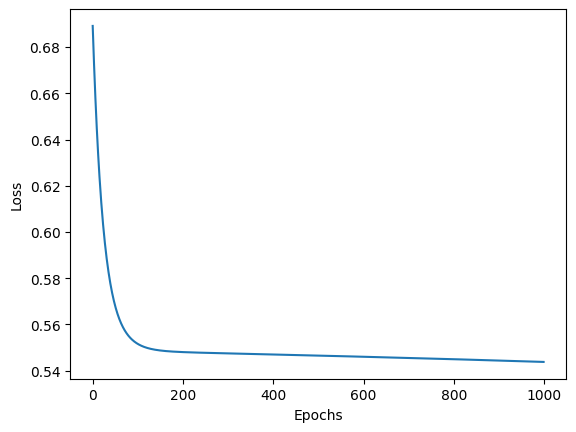

Training Losses are 
          0
0  0.862397
1  0.848013
2  0.834279
3  0.821171
4  0.808663
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


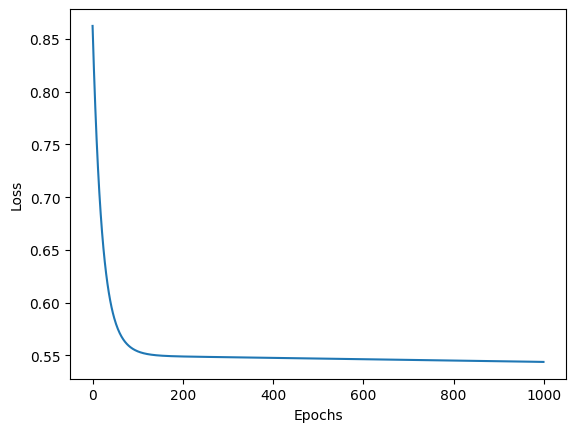

Training Losses are 
          0
0  0.590032
1  0.588375
2  0.586791
3  0.585275
4  0.583824
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


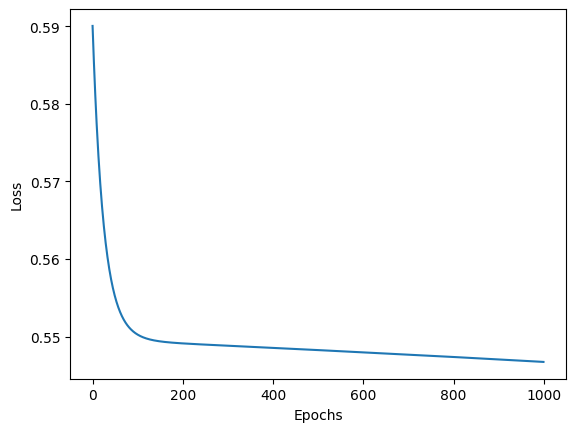

Training Losses are 
          0
0  0.709992
1  0.697345
2  0.685745
3  0.675103
4  0.665341
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


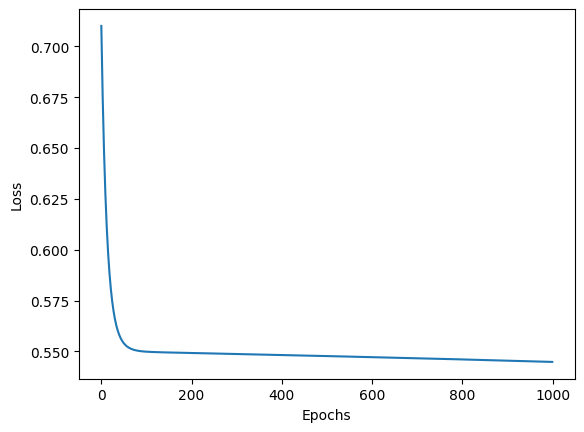

Training Losses are 
          0
0  0.663325
1  0.654153
2  0.645769
3  0.638106
4  0.631096
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


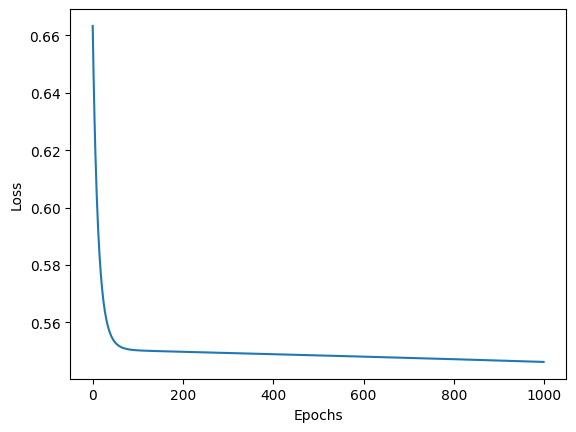

Training Losses are 
          0
0  0.835011
1  0.811807
2  0.790493
3  0.770932
4  0.752992
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


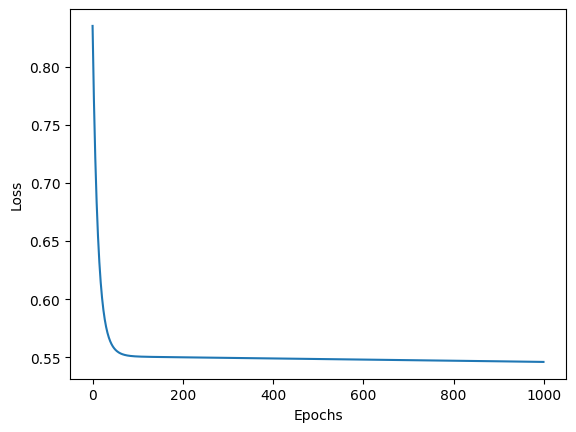

Training Losses are 
          0
0  0.650664
1  0.642268
2  0.634608
3  0.627615
4  0.621230
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


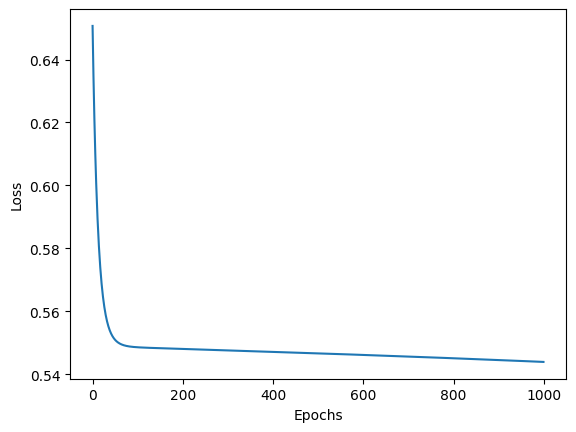

Training Losses are 
          0
0  0.630701
1  0.629415
2  0.628150
3  0.626907
4  0.625683
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


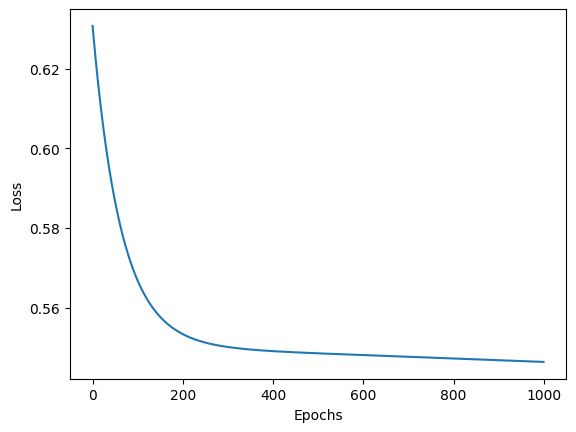

Training Losses are 
          0
0  1.039780
1  1.032009
2  1.024373
3  1.016869
4  1.009495
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


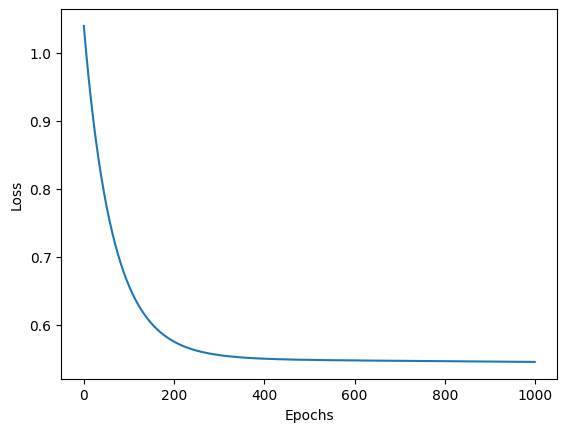

Training Losses are 
          0
0  0.758254
1  0.755292
2  0.752373
3  0.749496
4  0.746659
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


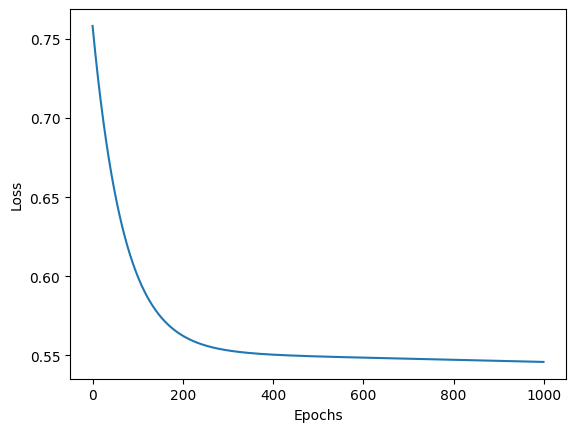

Training Losses are 
          0
0  0.655435
1  0.653951
2  0.652489
3  0.651048
4  0.649628
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


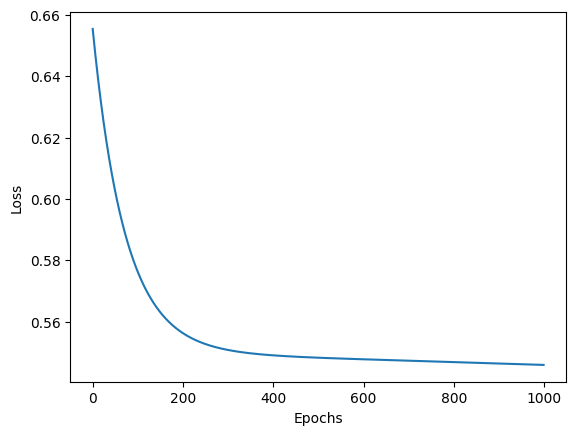

Training Losses are 
          0
0  0.646608
1  0.644114
2  0.641687
3  0.639325
4  0.637027
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


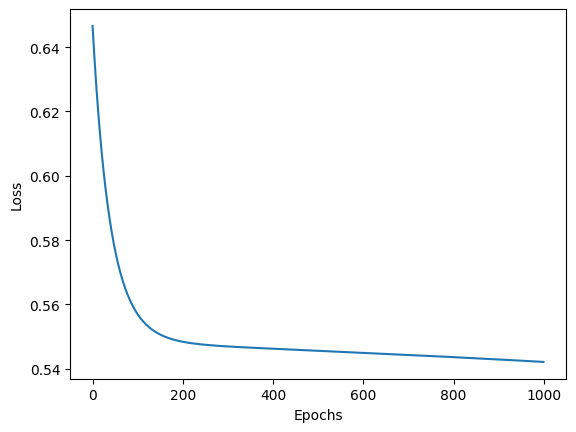

Training Losses are 
          0
0  0.716142
1  0.711904
2  0.707779
3  0.703763
4  0.699853
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


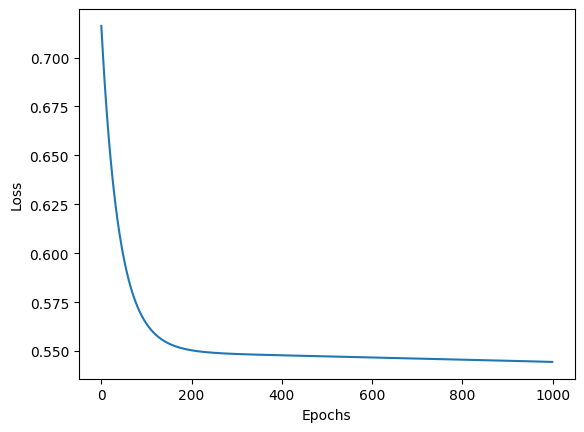

Training Losses are 
          0
0  0.783979
1  0.777591
2  0.771380
3  0.765341
4  0.759470
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


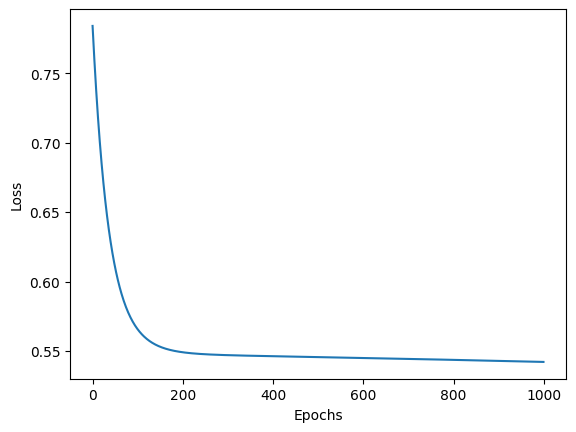

Training Losses are 
          0
0  0.617494
1  0.615897
2  0.614338
3  0.612818
4  0.611335
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


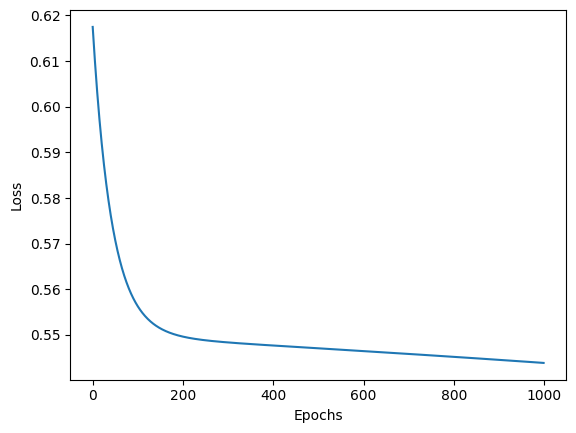

Training Losses are 
          0
0  0.921099
1  0.903707
2  0.887108
3  0.871274
4  0.856175
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


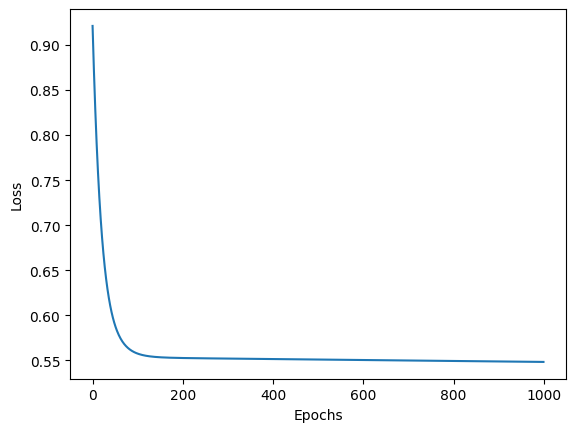

Training Losses are 
          0
0  0.664712
1  0.659730
2  0.654978
3  0.650446
4  0.646122
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


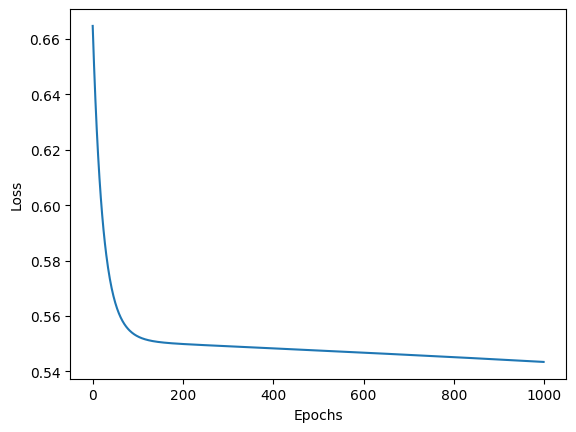

Training Losses are 
          0
0  0.659398
1  0.654555
2  0.649936
3  0.645530
4  0.641325
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


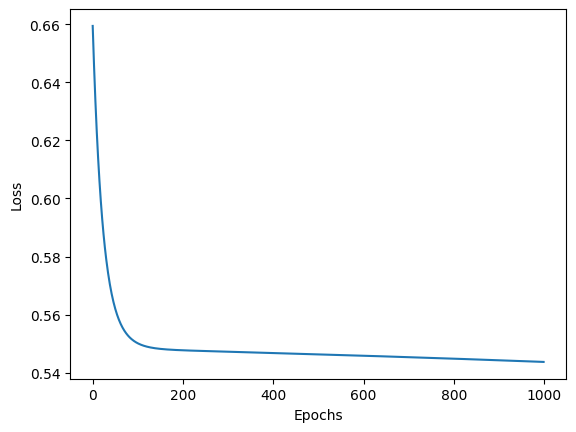

Training Losses are 
          0
0  0.682054
1  0.675981
2  0.670203
3  0.664704
4  0.659471
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


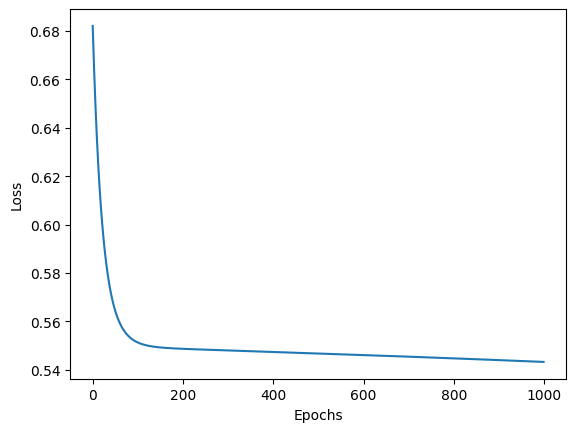

Training Losses are 
          0
0  0.774673
1  0.755374
2  0.737788
3  0.721771
4  0.707188
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


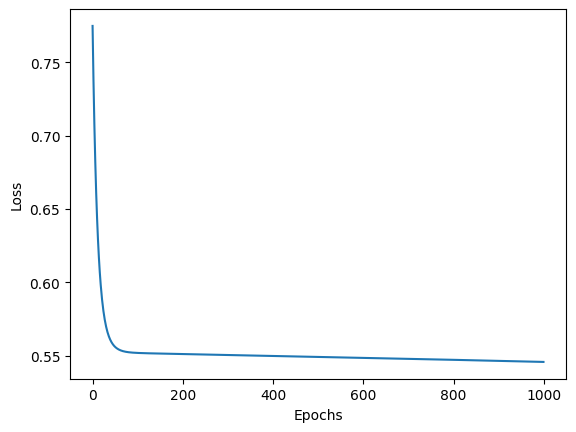

Training Losses are 
          0
0  0.675475
1  0.665399
2  0.656173
3  0.647722
4  0.639980
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


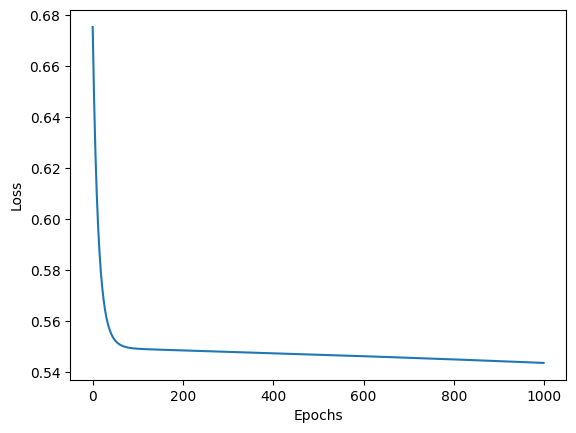

Training Losses are 
          0
0  0.602464
1  0.598686
2  0.595207
3  0.592001
4  0.589044
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


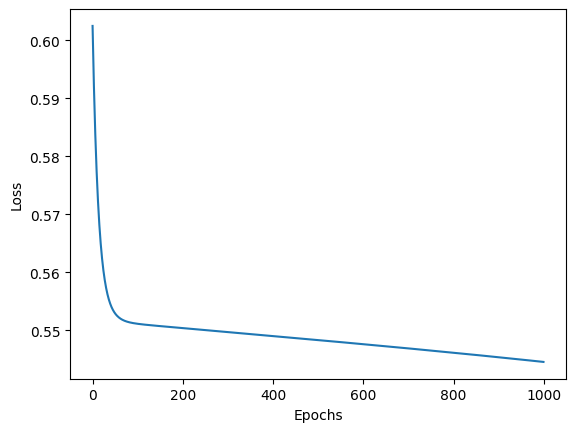

Training Losses are 
          0
0  0.657415
1  0.649028
2  0.641345
3  0.634305
4  0.627852
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


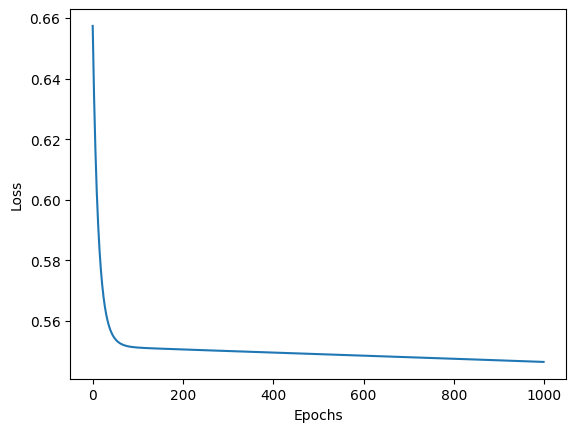

In [35]:
nuerons = [8,16,32,64]
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = DoubleLayer(34,nueron,double_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.SGD(model.parameters(), lr=0.01)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()